<a href="https://colab.research.google.com/github/bpandey369/Electricity-Consumptions/blob/main/Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
link = 'https://drive.google.com/file/d/16ehN7ZyCVi0jdqDLqxlqub-O7PomMG8T/view?usp=drive_link'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/power_consumption.txt',sep=';',na_values='?')

In [5]:
df.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [7]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
df.shape

(2075259, 9)

In [9]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
df['Datetime'] = df['Date'] + ' ' + df['Time']

In [11]:
df.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

              Datetime  
0  16/12/2006 17:24:00  
1  16/12/2006 17:25:00  
2  16/12/2006 17:26:00  
3  16/12/2006 17:27:00  
4  16/12/2006 17:28:00

In [12]:
from datetime import datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M:%S')

In [13]:
df.set_index('Datetime', inplace=True)

In [14]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [15]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
Datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [17]:
for col in list(df.columns):
  df[col] = pd.to_numeric(df[col])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [19]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

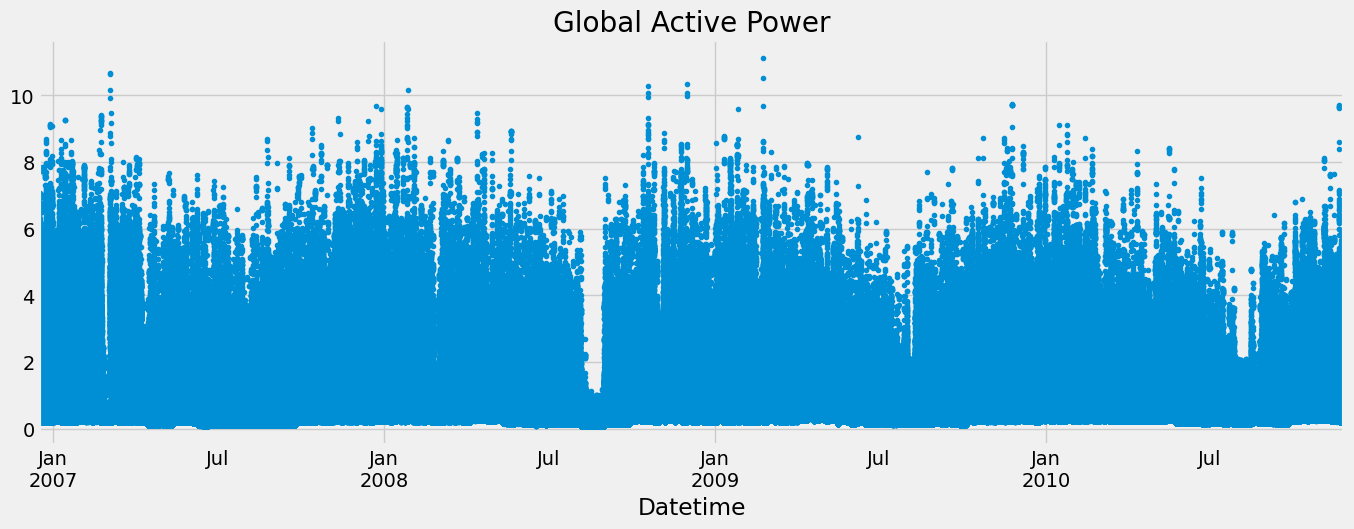

In [20]:
df['Global_active_power'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Global Active Power')
plt.show()

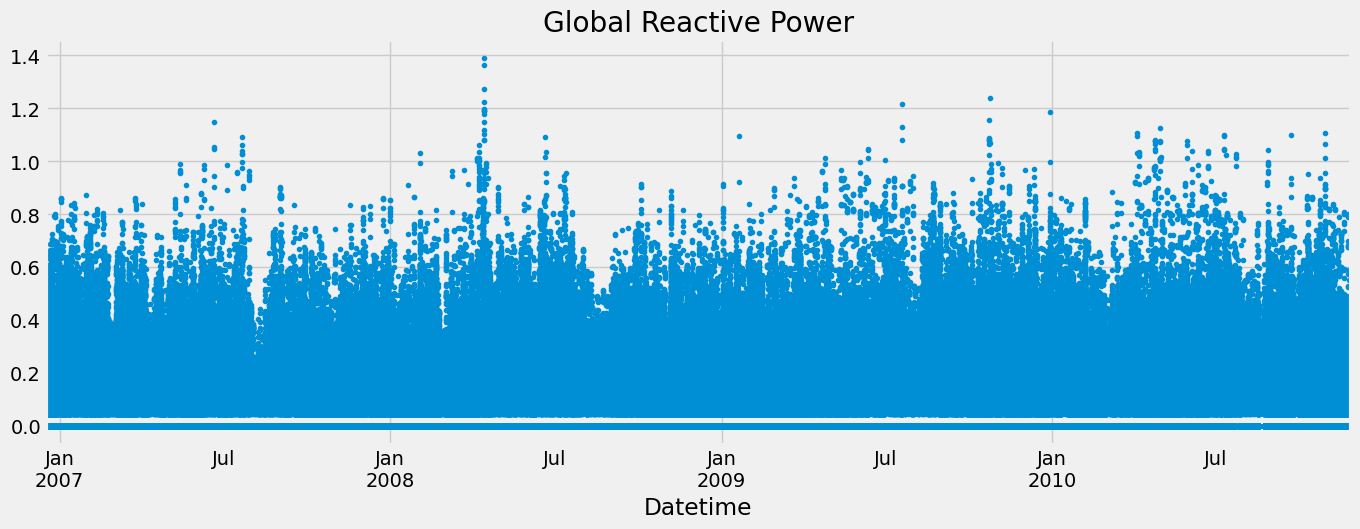

In [21]:
df['Global_reactive_power'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Global Reactive Power')
plt.show()

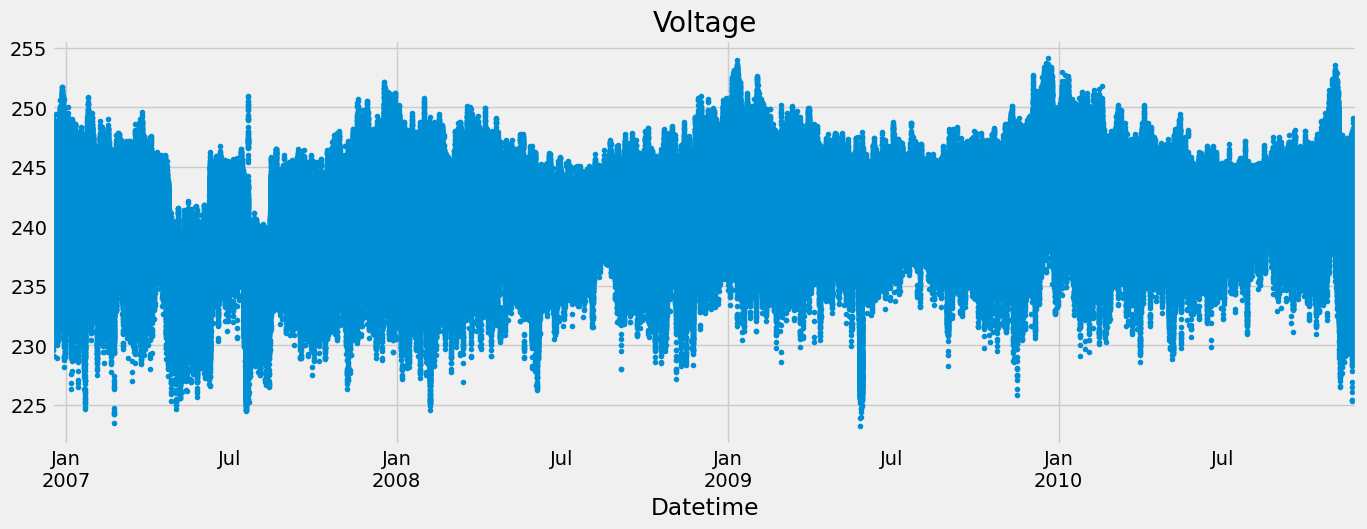

In [22]:
df['Voltage'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Voltage')
plt.show()

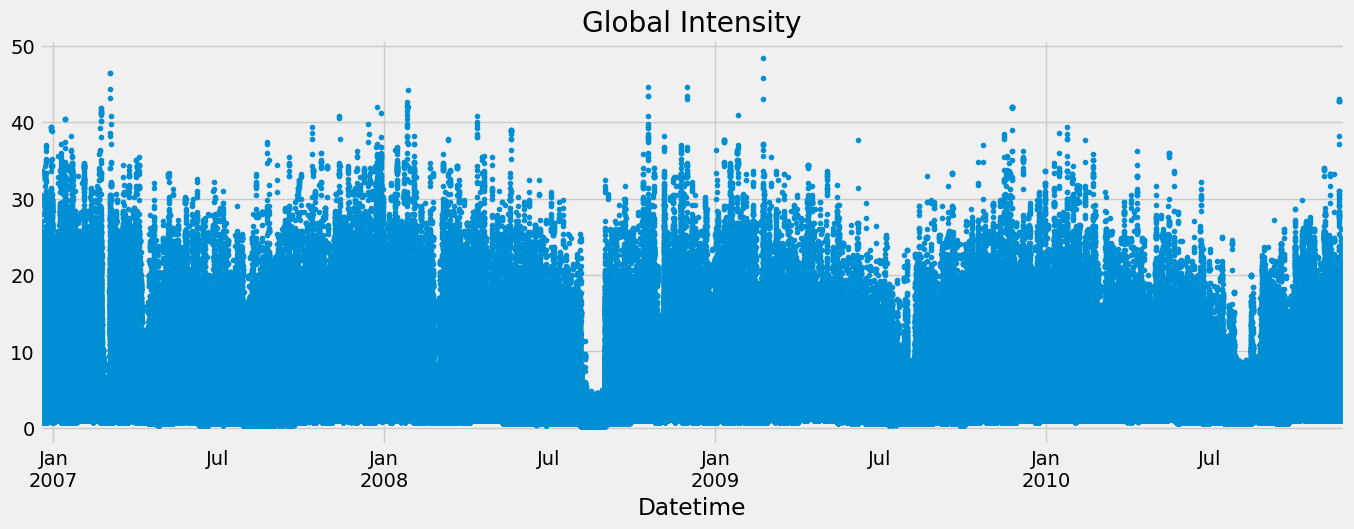

In [23]:
df['Global_intensity'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Global Intensity')
plt.show()

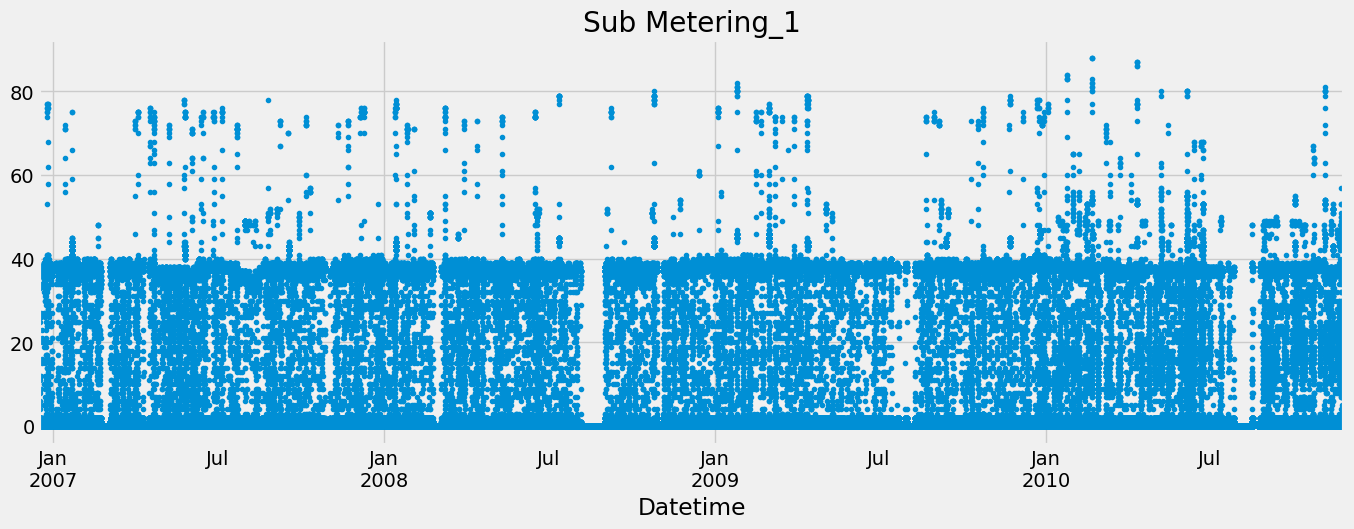

In [24]:
df['Sub_metering_1'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Sub Metering_1')
plt.show()

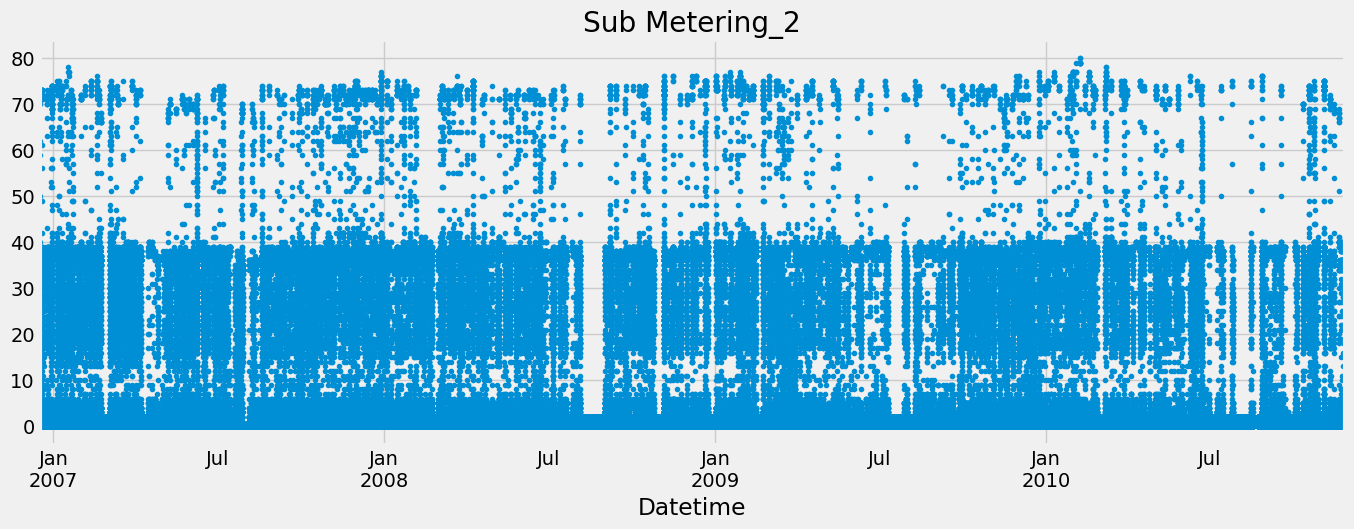

In [25]:
df['Sub_metering_2'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Sub Metering_2')
plt.show()

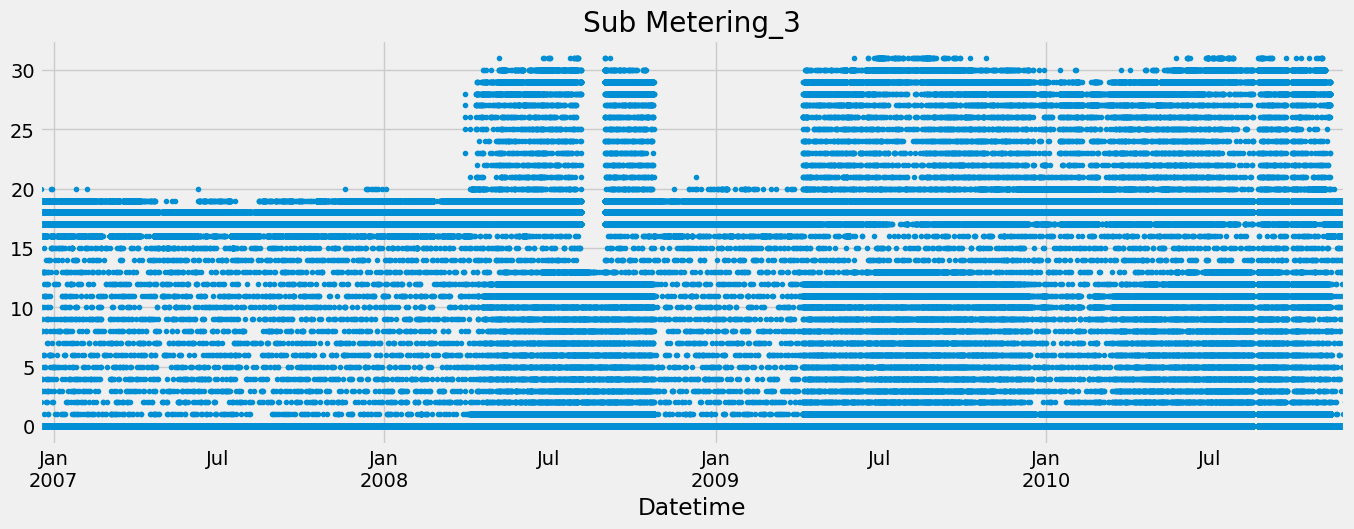

In [26]:
df['Sub_metering_3'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Sub Metering_3')
plt.show()

In [27]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
Datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [28]:
df.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   

                       Sub_metering_3  
Global_active_power          0.638555  
Global_reactive_power        0.089617  
Voltage                     -0.268172  
Global_intensity             0.626543  
Sub_metering_1               0.102571  
Sub_metering_2               0.080872  
Sub_metering_3               1.000000

In [29]:
# Let's find out how many days have not been recored in our dataset
missing_days_df = np.round(df[['Global_active_power']].resample('m').count()/1440).astype(int)
missing_days_df.columns = ['Number of missing days']
missing_days_df['Number of missing days'] = missing_days_df.index.astype(str).str[-2:].astype(int) - missing_days_df['Number of missing days']

In [30]:
# Drop the rows where the number of missing days is 0
missing_days_df.drop(missing_days_df[missing_days_df['Number of missing days']==0].index,inplace=True)

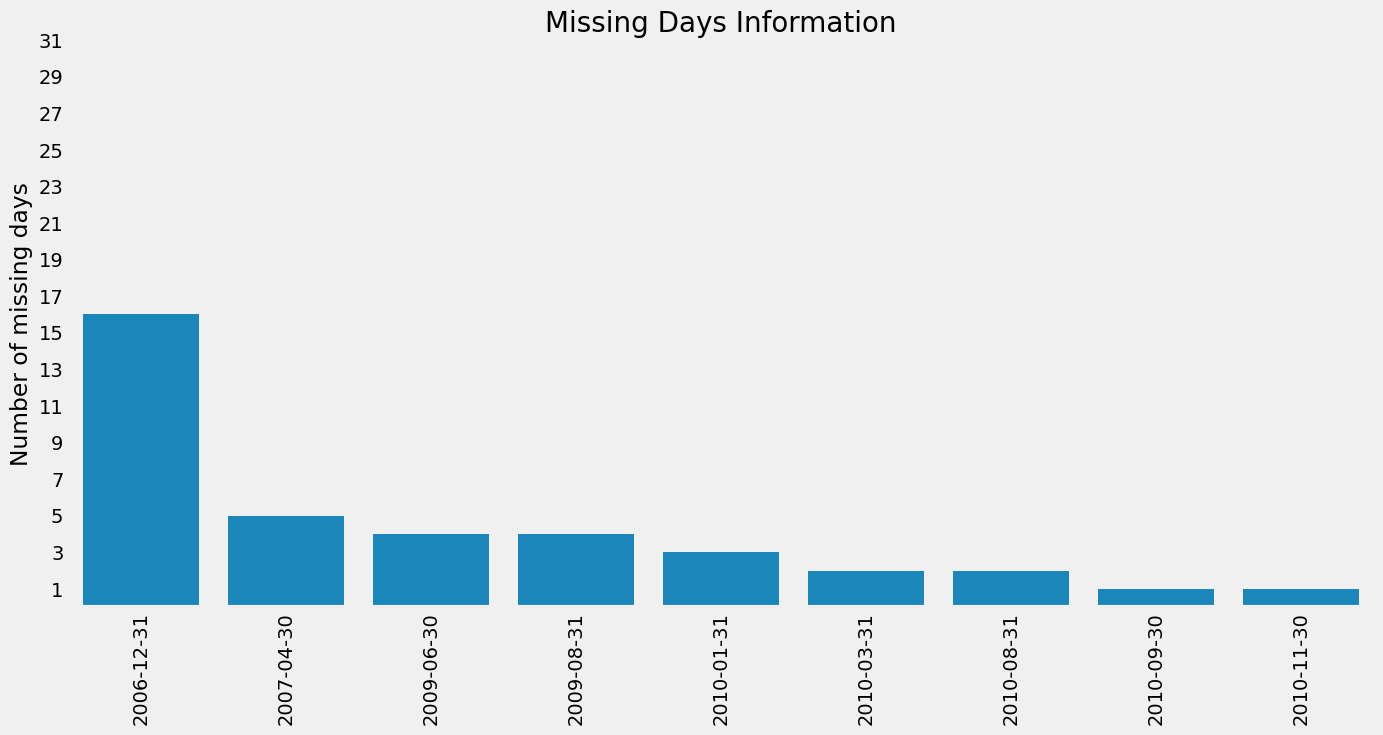

In [31]:

# Drawing the plot
plt.figure(figsize=(15,7))
sns.barplot(
    data = missing_days_df,
    x = missing_days_df.index.date,
    y = missing_days_df.sort_values(by=['Number of missing days'],ascending=False)['Number of missing days']
)
plt.xticks(rotation = 90)
plt.yticks(np.arange(1,32,2))
plt.xlabel('')
plt.grid(axis='y')
plt.title('Missing Days Information',fontsize=20)
plt.show()

In [32]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

import math
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

In [33]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [34]:
#  Deal with Missing Values
# Find All Columns Having nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)

droping_list_all

[0, 1, 2, 3, 4, 5, 6]

<Axes: >

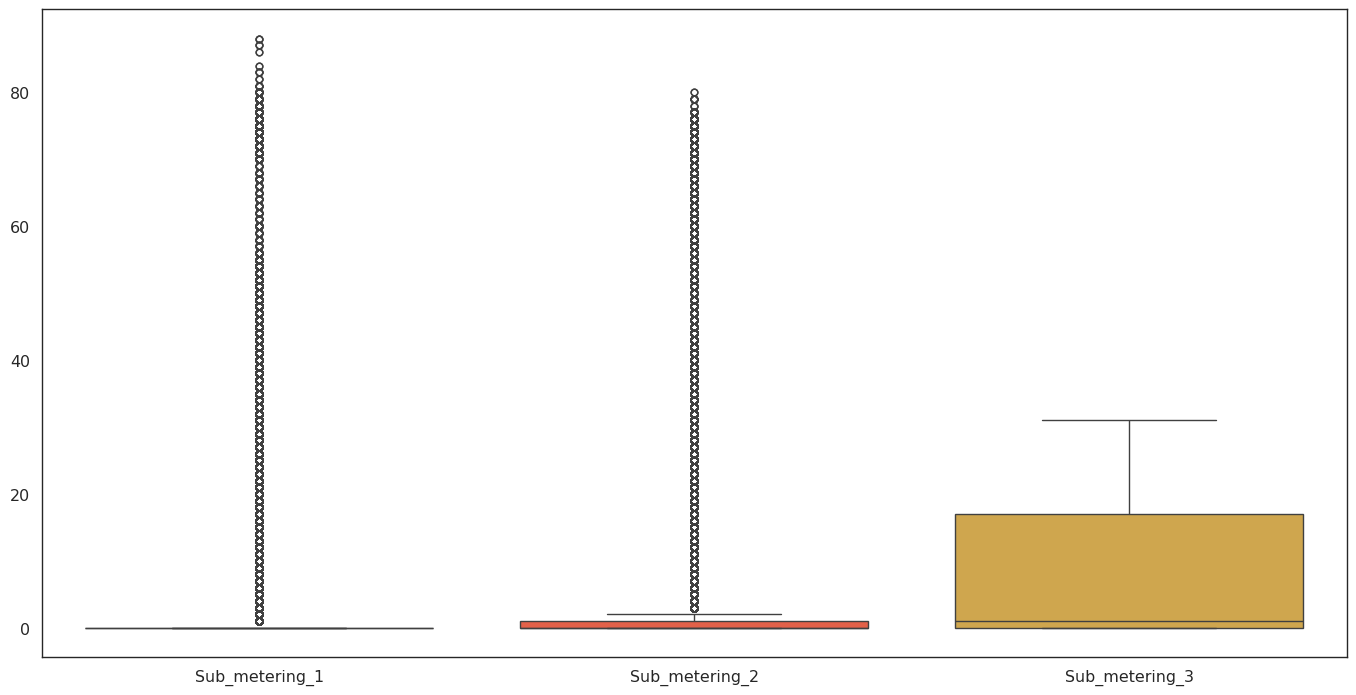

In [35]:
#  Plotting Boxplot For Checking Median & Mean Values To Fill Null Values.
plt.figure(figsize=(15,8))
sns.boxplot(data=df.iloc[:,4:])

<Axes: >

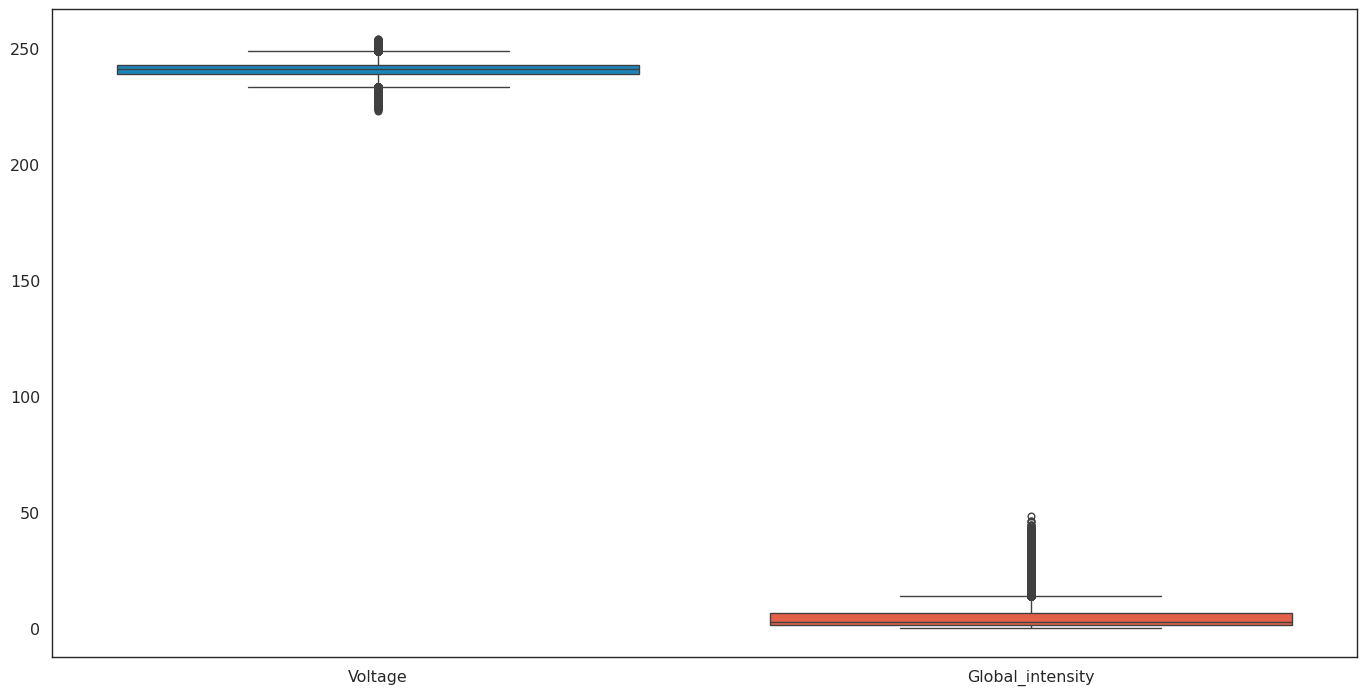

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.iloc[:,2:4])

<Axes: >

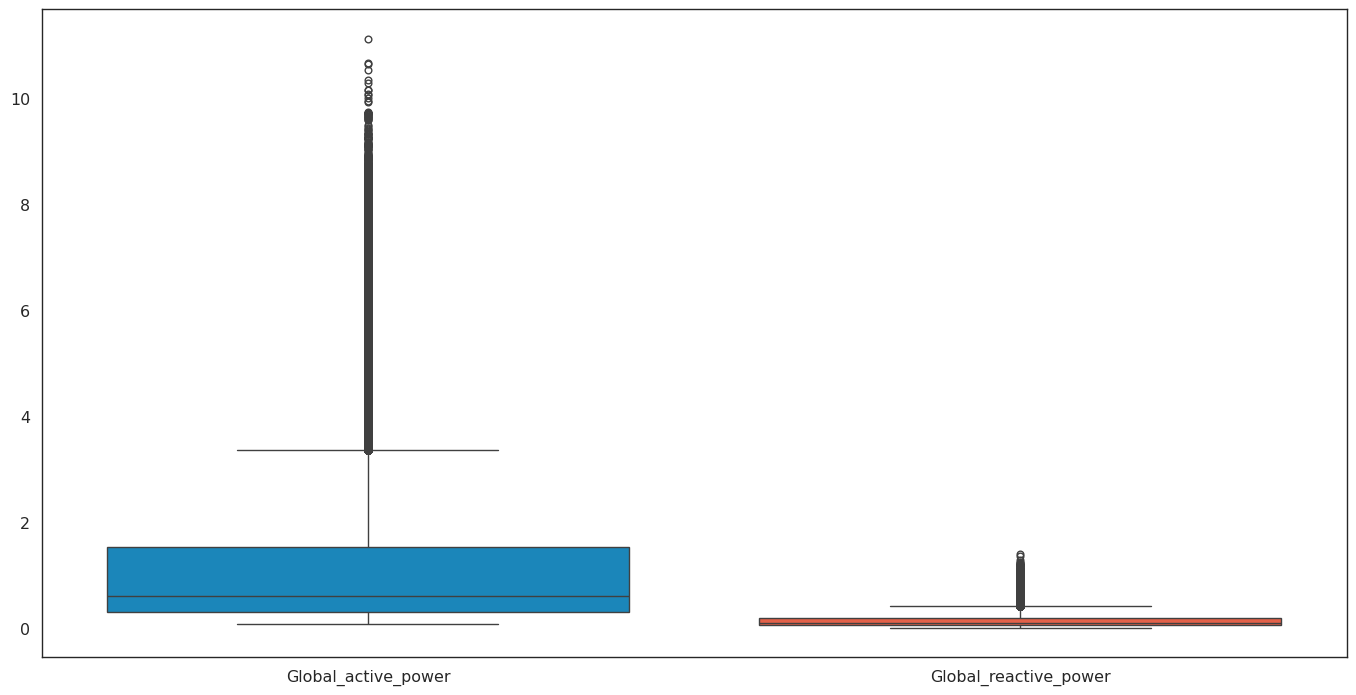

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.iloc[:,:2])

In [38]:
# Fill nan With Mean All Columns

for j in range(0,7):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [39]:
#  Another Sanity Check To Make Sure That There Are Not More Any nan
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

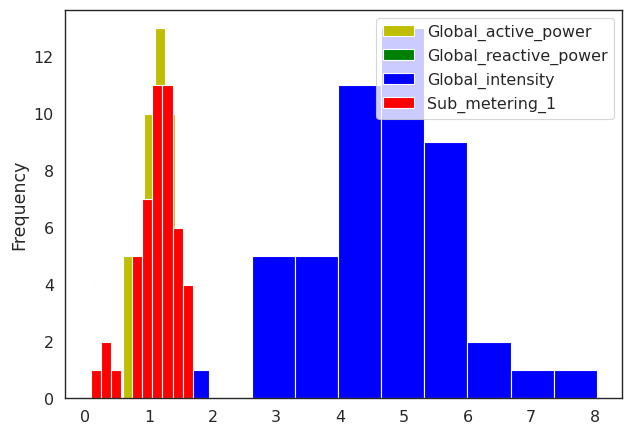

In [40]:
#  EDA
#  Data Visualization
#  Hist Plot Of The Mean Of Different Feature Resampled Over Month
df.Global_active_power.resample('M').mean().plot(kind='hist', color='y', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='b', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='r', legend=True)
plt.show()

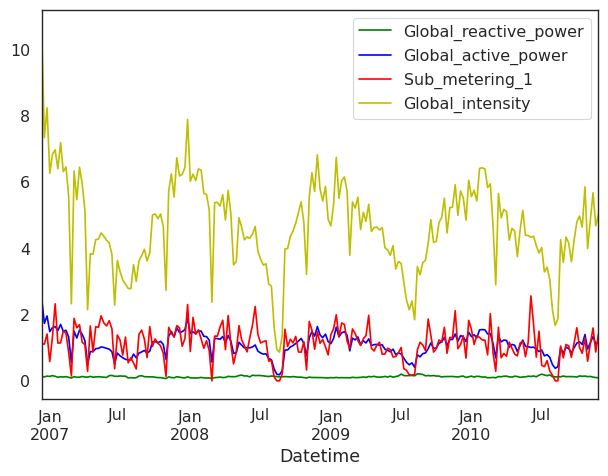

In [41]:
#  Resampling Over Week & Computing Mean
df.Global_reactive_power.resample('W').mean().plot(color='g', legend=True)
df.Global_active_power.resample('W').mean().plot(color='b', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='r', legend=True)
df.Global_intensity.resample('W').mean().plot(color='y', legend=True)
plt.show()

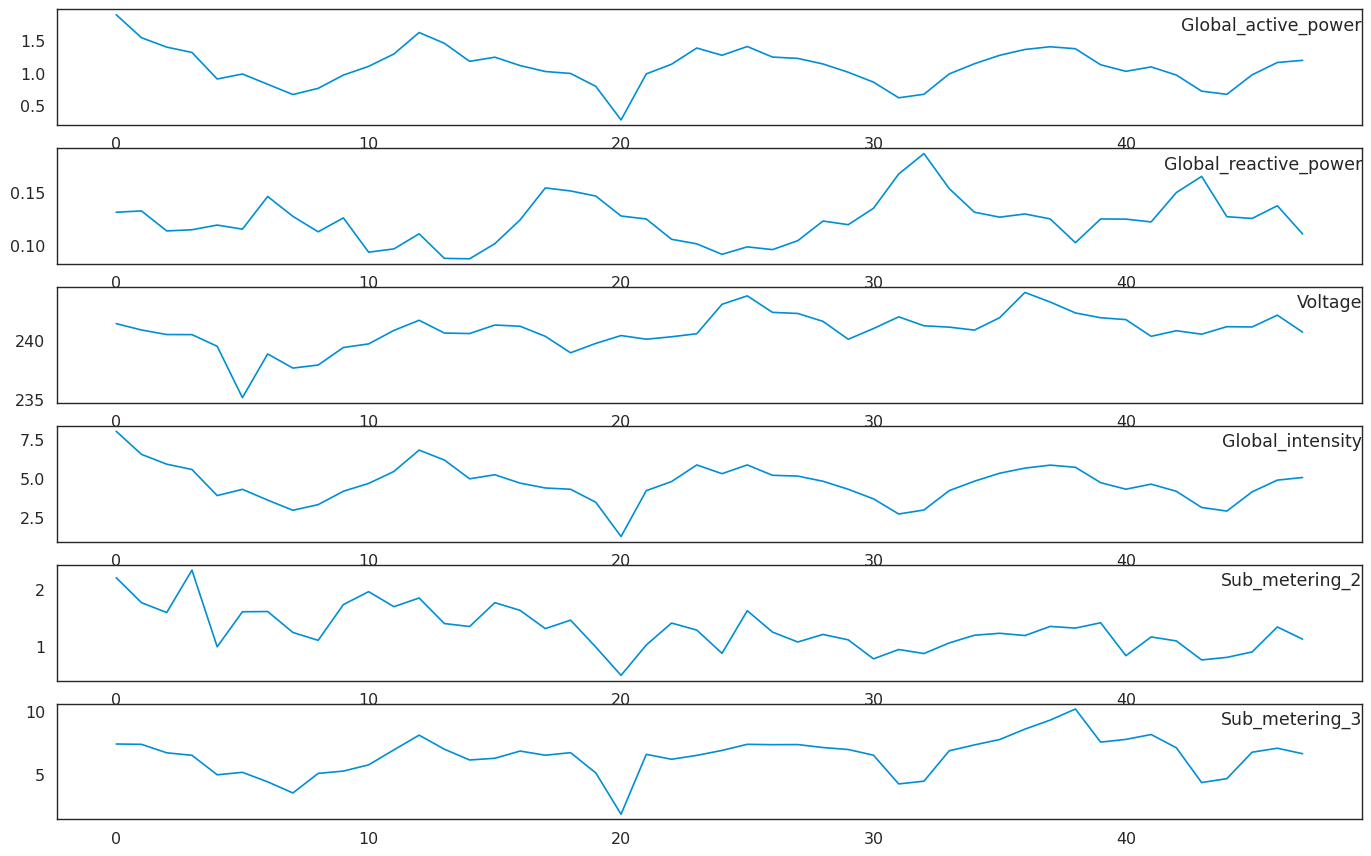

In [42]:
#  Resampling Over Month & Computing Mean
#  Specifying Columns To Plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('M').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

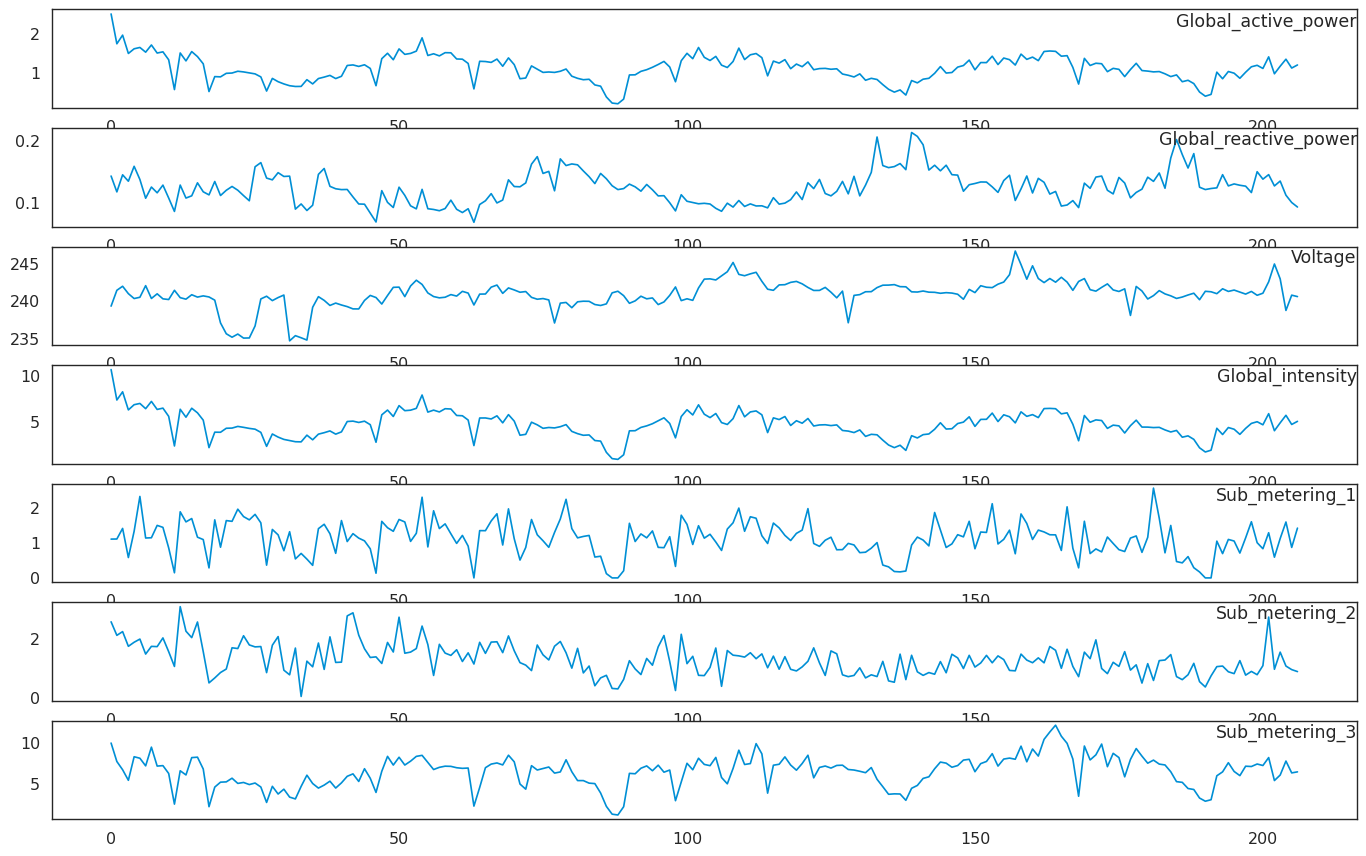

In [43]:
#  Resampling Over Week & Computing Mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = df.resample('W').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

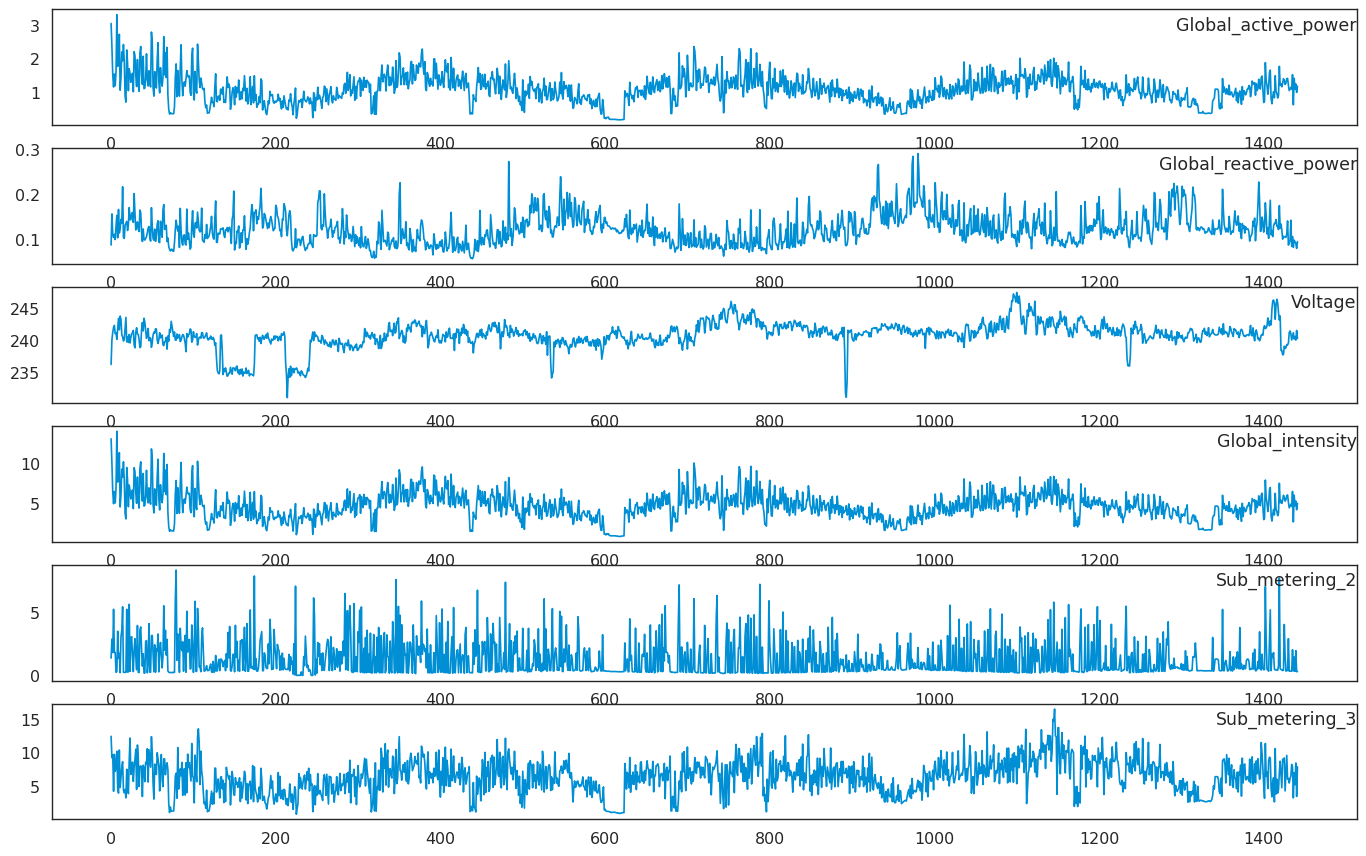

In [44]:
#  Comparing The Mean of Different Features Resampled Over Day
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [45]:
week_info = df.resample('W')
week = week_info.sum()

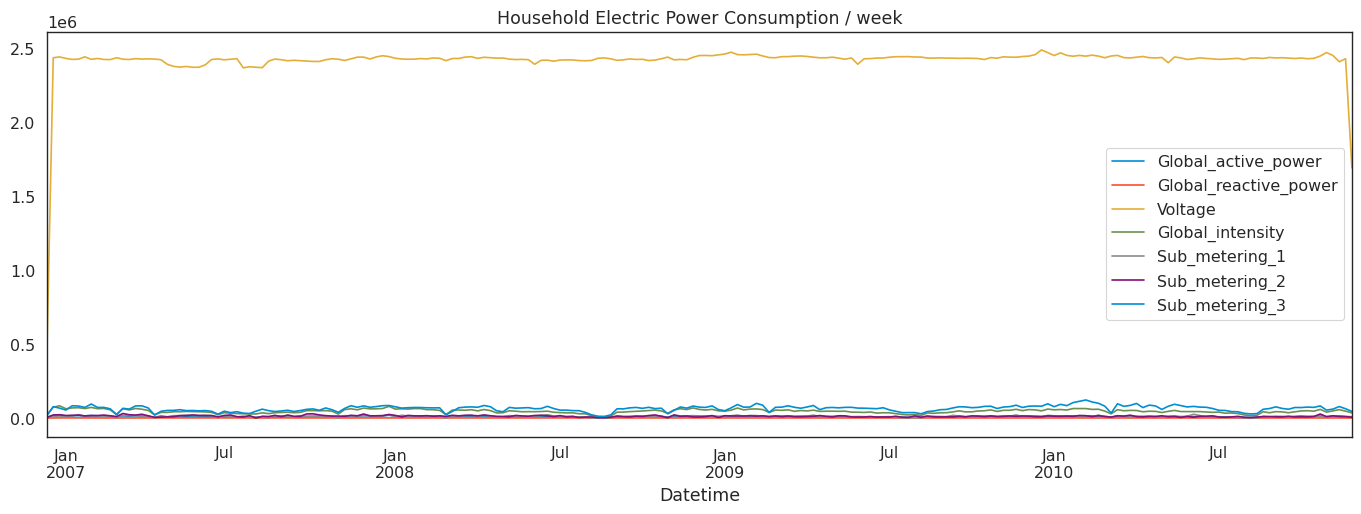

In [46]:
x = week.plot(title='Household Electric Power Consumption / week', figsize=(15,5))

In [47]:
daily_info = df.resample('D')
day = daily_info.sum()

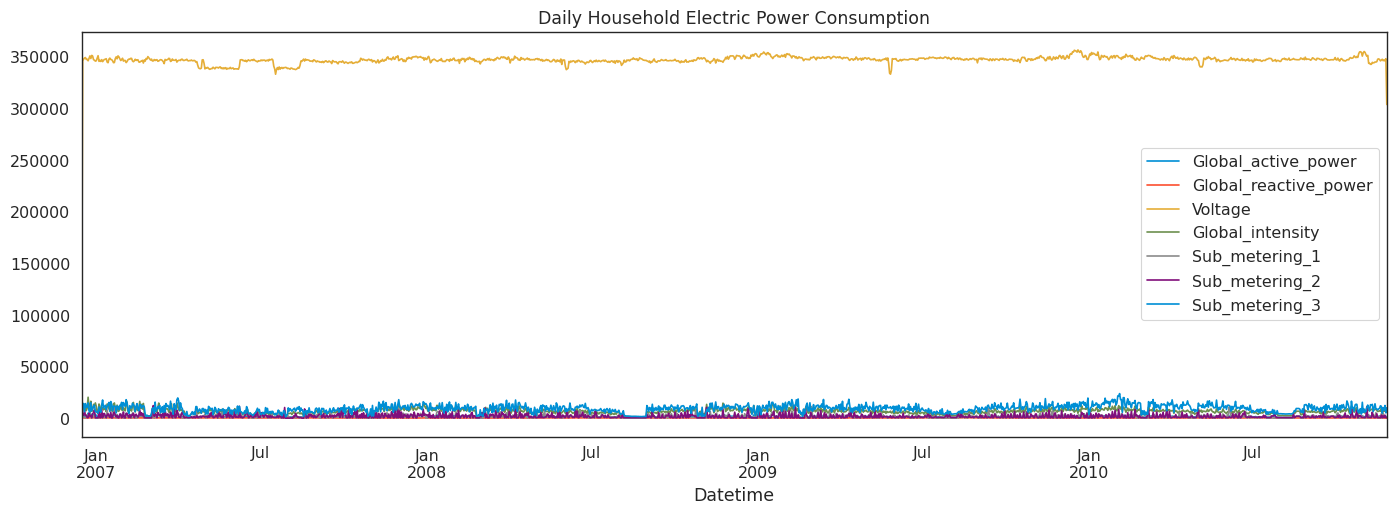

In [48]:
y = day.plot(title='Daily Household Electric Power Consumption', figsize=(15,5))


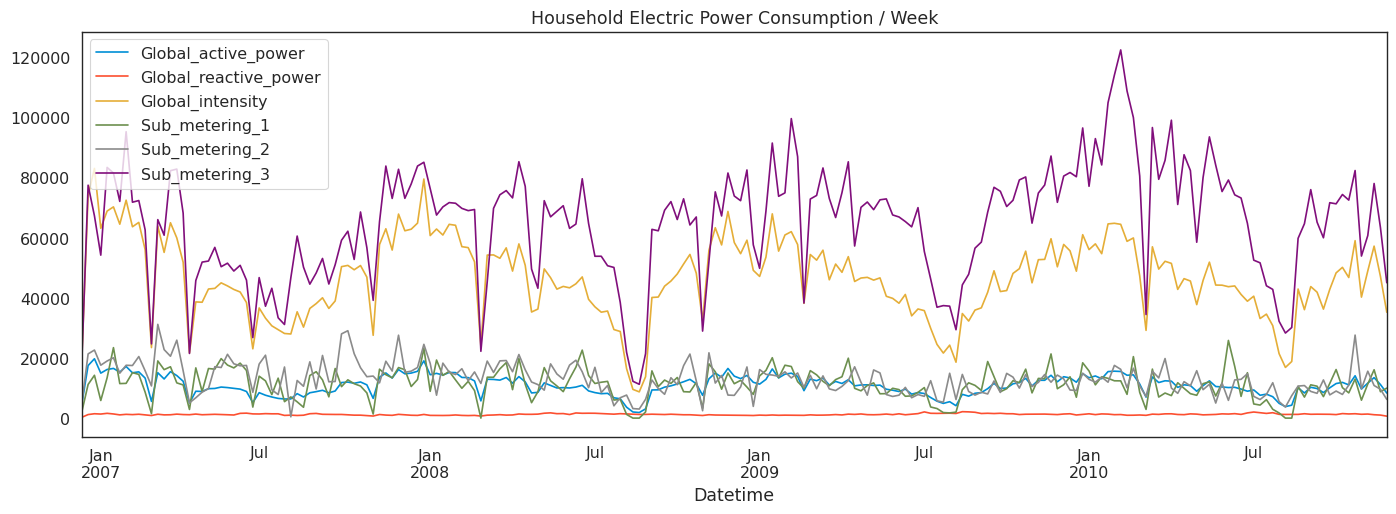

In [49]:
week_data = week.drop(columns=['Voltage'])
a = week_data.plot(title='Household Electric Power Consumption / Week', figsize=(15,5))

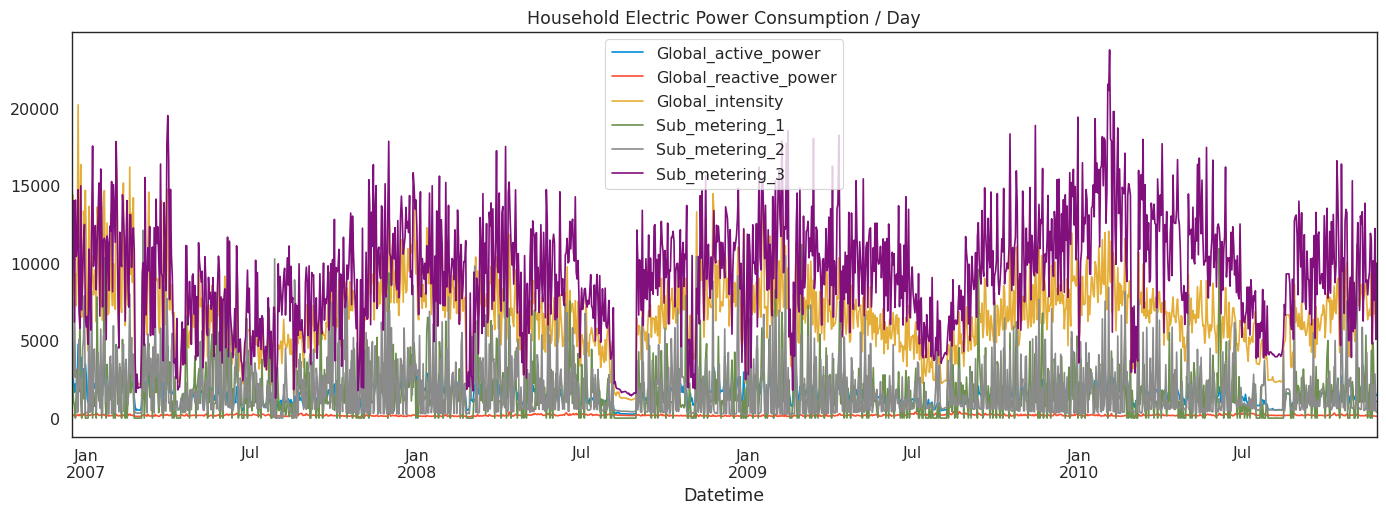

In [50]:
daily_data = day.drop(columns=['Voltage'])
b = daily_data.plot(title='Household Electric Power Consumption / Day', figsize=(15,5))

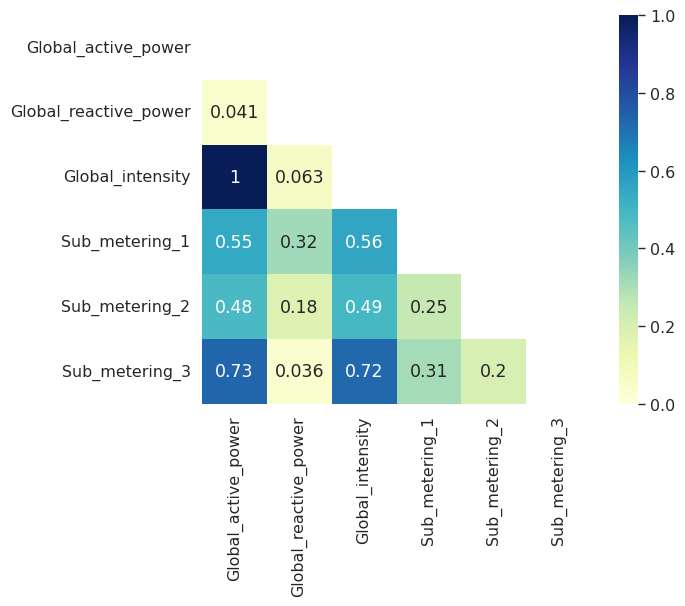

In [51]:
p = daily_data.corr(method='pearson')
mask = np.zeros_like(p)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(p, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

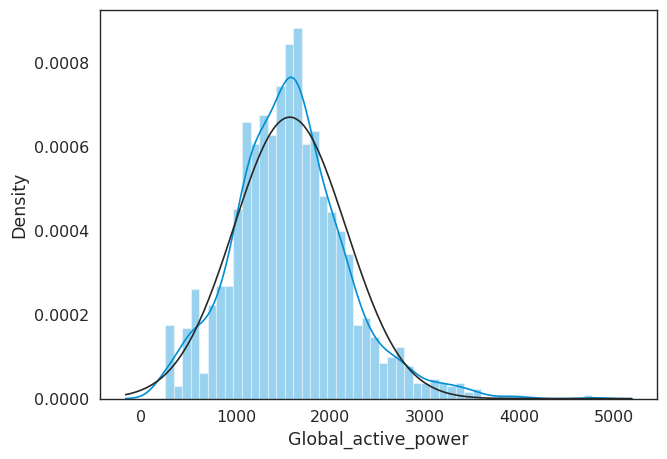

In [52]:
z = sns.distplot(daily_data['Global_active_power'], fit=norm, bins=50, kde=True);

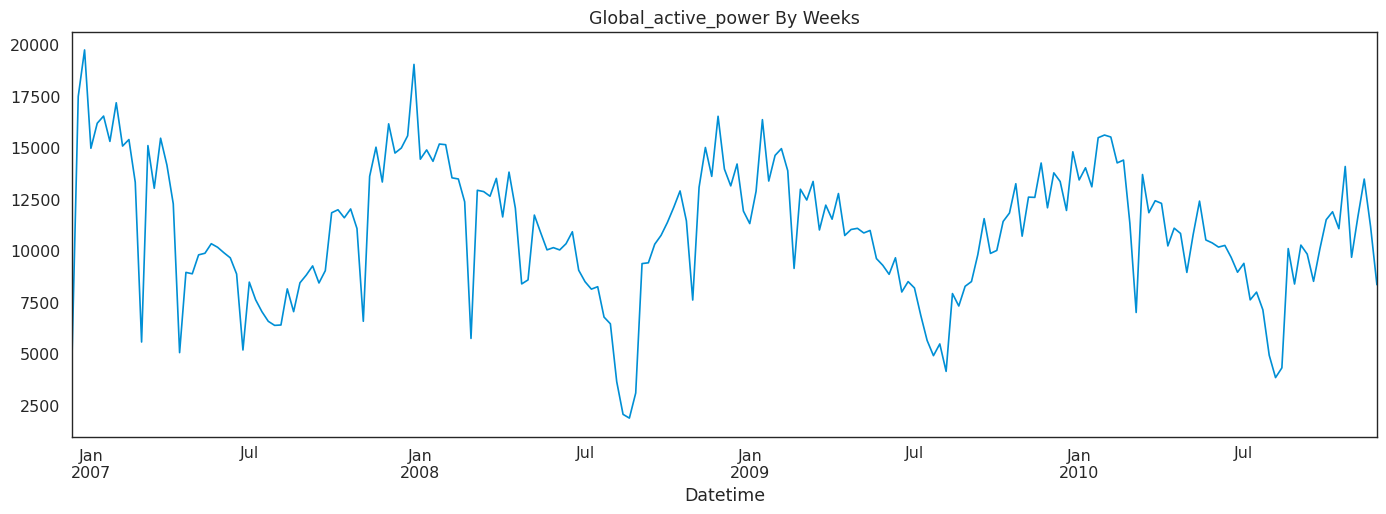

In [53]:
c = week_data.Global_active_power.plot(title='Global_active_power By Weeks', figsize=(15,5))

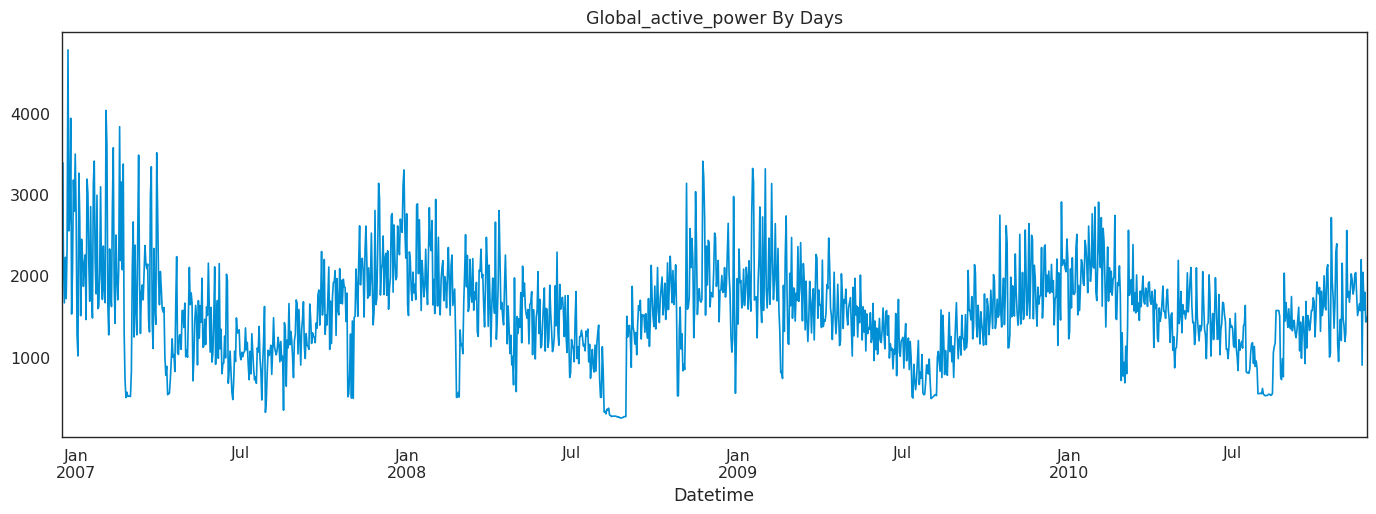

In [54]:
d = daily_data.Global_active_power.plot(title='Global_active_power By Days', figsize=(15,5))

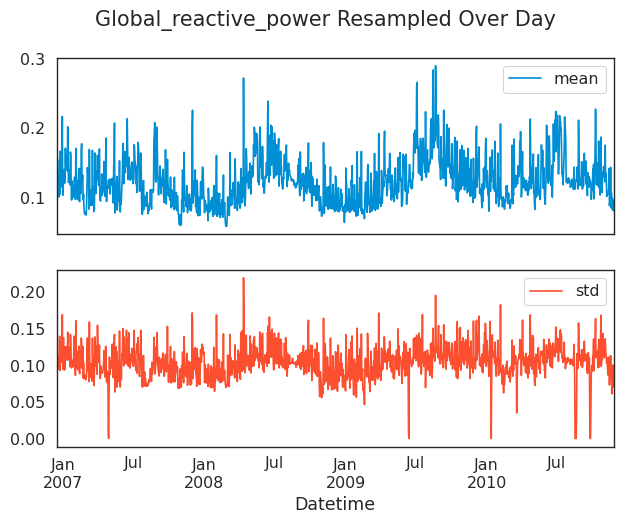

In [56]:
#  Standard Deviation & Mean of 'Global_reactive_power' Resampled Over Day
x1 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
x1.plot(subplots = True, title='Global_reactive_power Resampled Over Day')
plt.show()

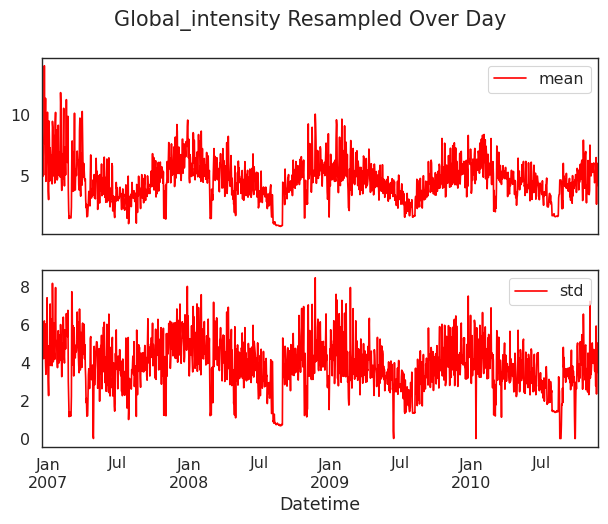

In [57]:
#  Standard Deviation & Mean of 'Global_intensity' Resampled Over Day
x2 = df.Global_intensity.resample('D').agg(['mean', 'std'])
x2.plot(subplots = True, title='Global_intensity Resampled Over Day', color='red')
plt.show()

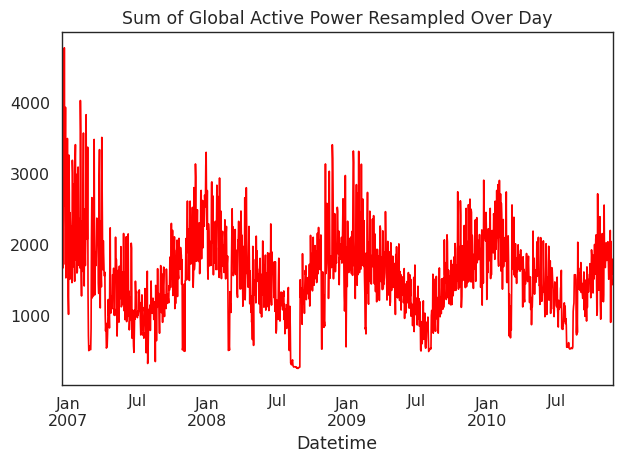

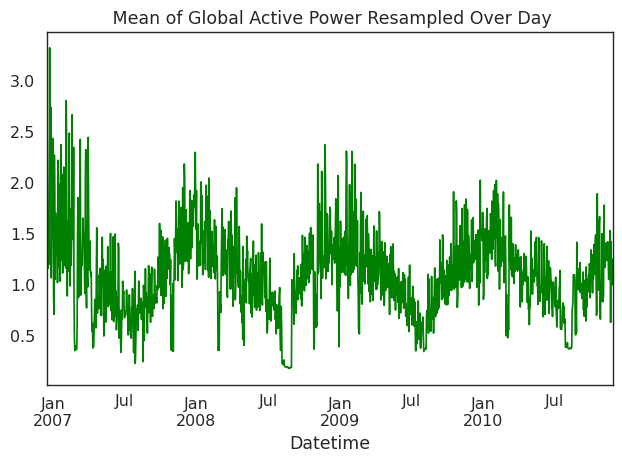

In [58]:
#  Resampling Over Day, & Showing The Mean & Sum of Global_active_power
df.Global_active_power.resample('D').sum().plot(title='Sum of Global Active Power Resampled Over Day', color='red')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title=' Mean of Global Active Power Resampled Over Day', color='green')
plt.tight_layout()
plt.show()

In [60]:
#  Calculating Power Consumed Per Month
#  Global_reactive_power
#  Sum of 'Global_reactive_power' Resampled Over Month
df['Global_reactive_power'].resample('M').sum().tail()

Datetime
2010-07-31    7387.013714
2010-08-31    5676.036806
2010-09-30    5421.554712
2010-10-31    6140.539714
2010-11-30    4128.708000
Freq: M, Name: Global_reactive_power, dtype: float64

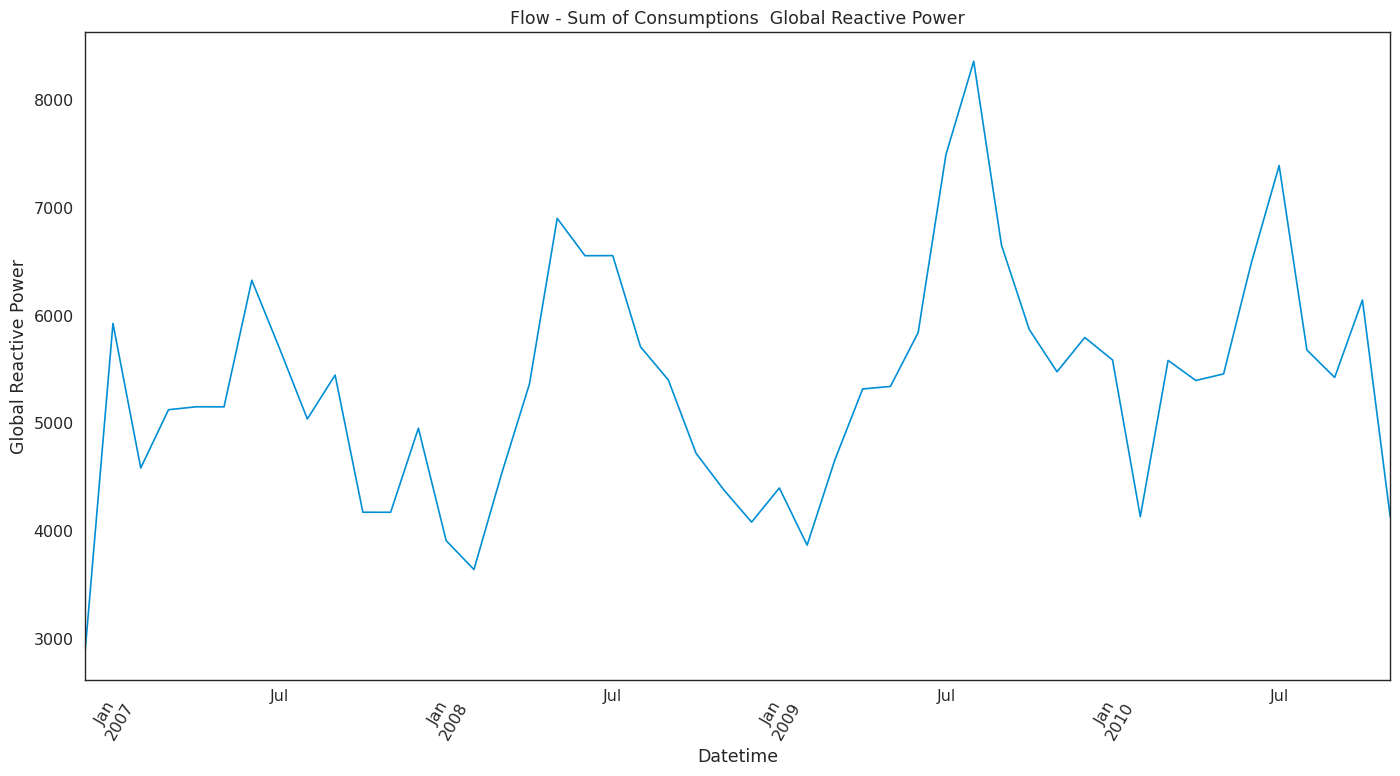

In [61]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
df['Global_reactive_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow - Sum of Consumptions  Global Reactive Power')
plt.show()

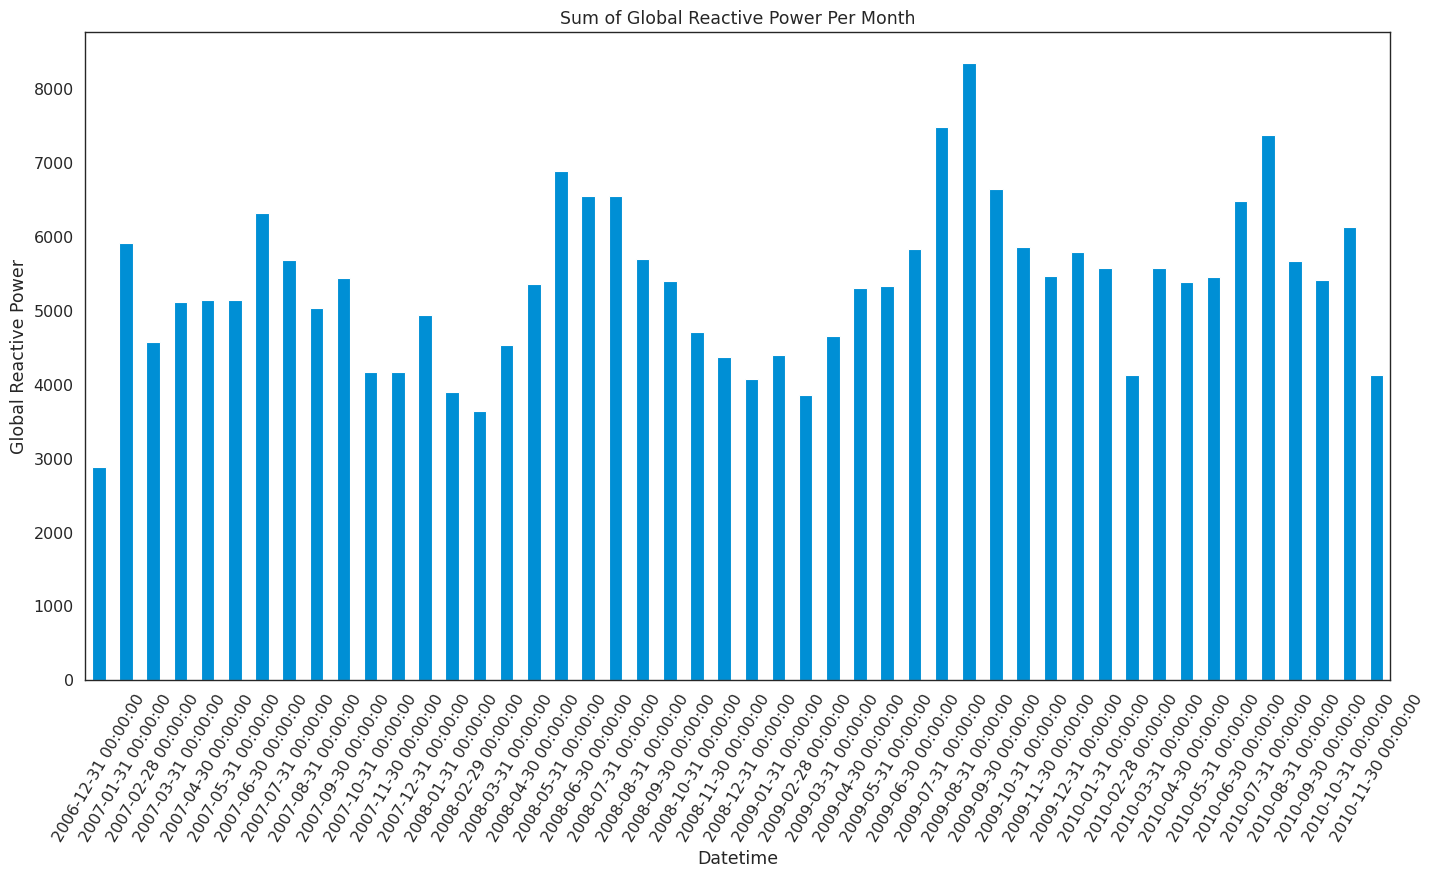

In [62]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
df['Global_reactive_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Sum of Global Reactive Power Per Month')
plt.show()

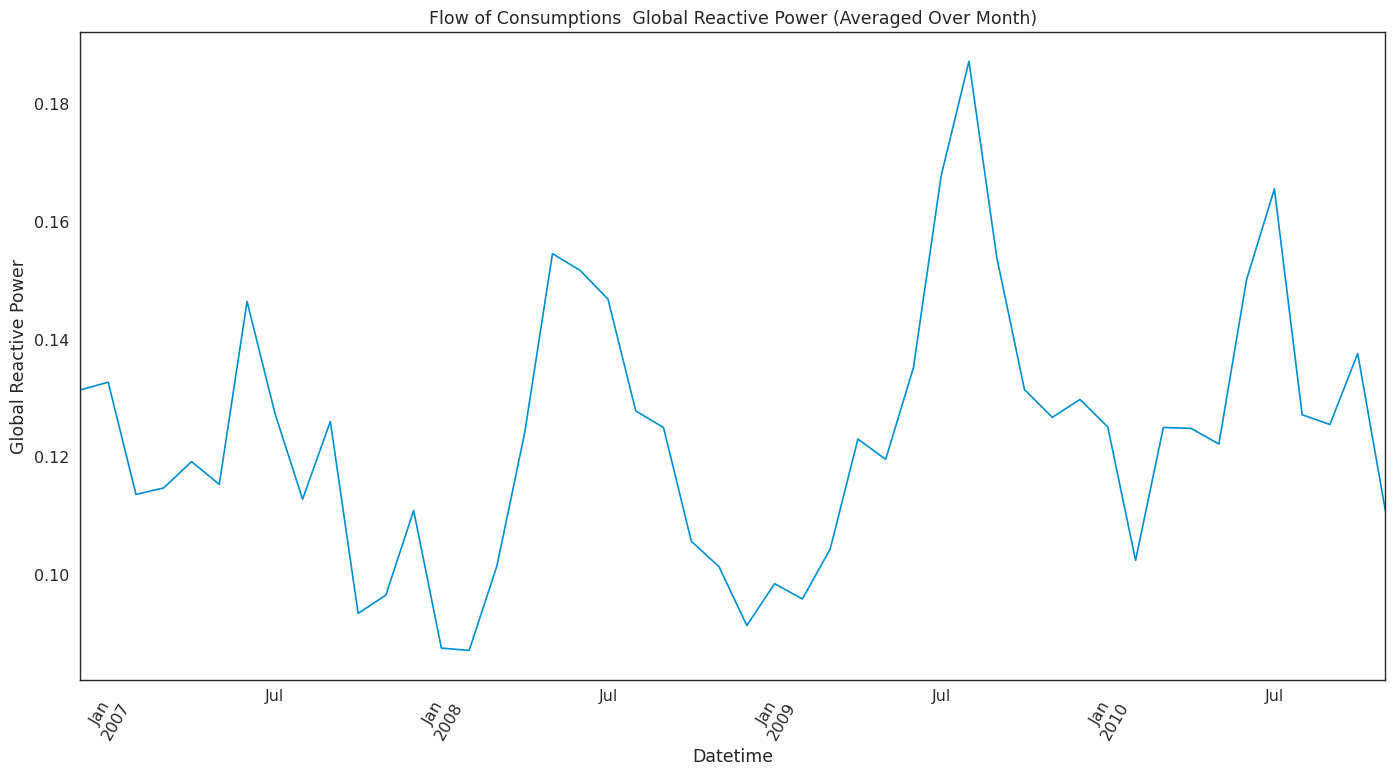

In [63]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
df['Global_reactive_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow of Consumptions  Global Reactive Power (Averaged Over Month)')
plt.show()

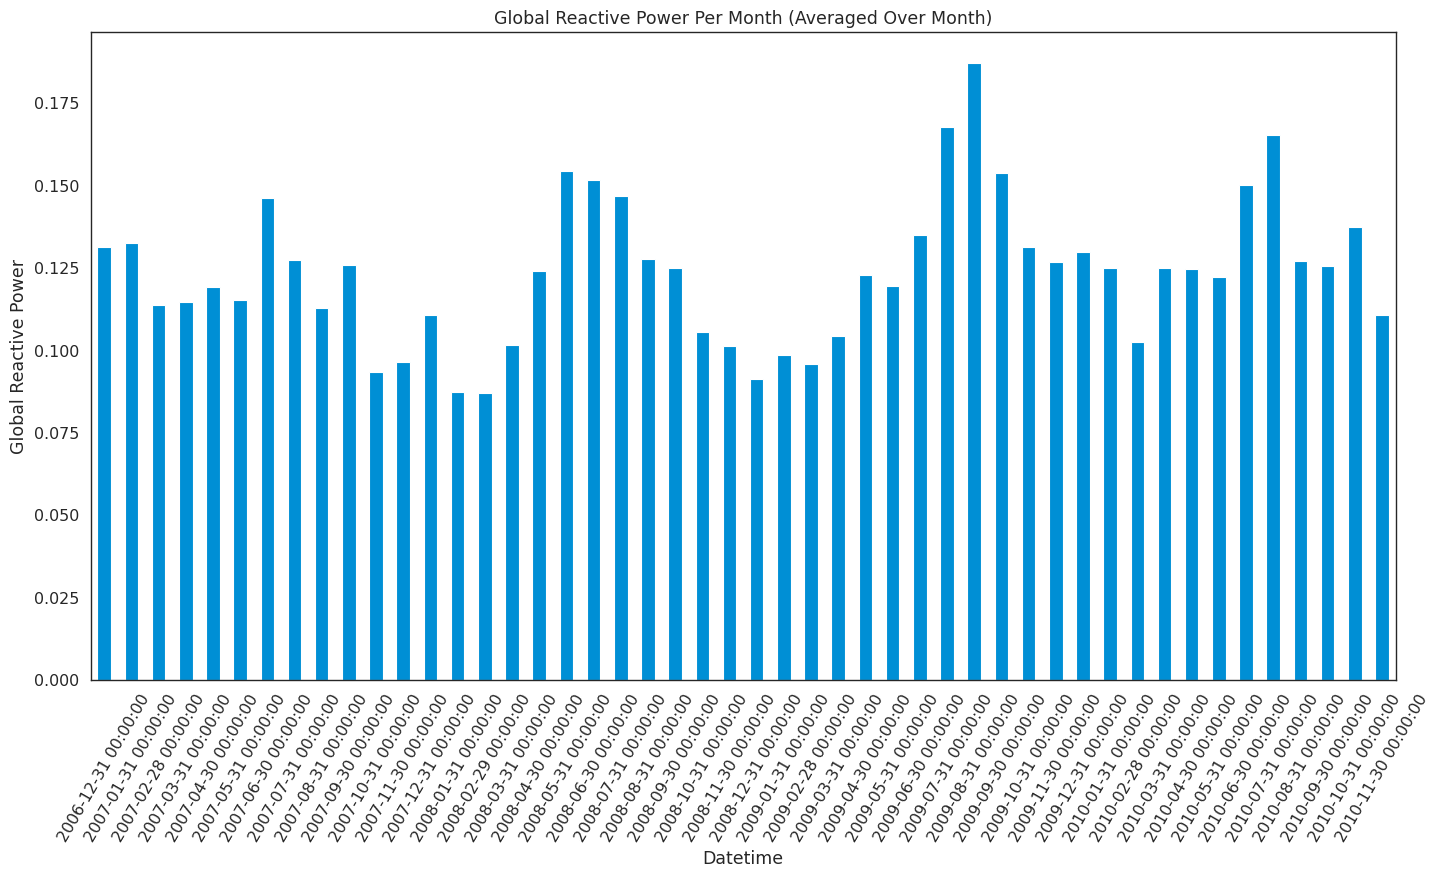

In [64]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
df['Global_reactive_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Global Reactive Power Per Month (Averaged Over Month)')
plt.show()

In [65]:
#  Global_active_power
# Sum of 'Global_active_power' Resampled Over Month
df['Global_active_power'].resample('M').sum().tail()

Datetime
2010-07-31    32188.843615
2010-08-31    29991.384254
2010-09-30    42026.211946
2010-10-31    51934.045615
2010-11-30    44598.388000
Freq: M, Name: Global_active_power, dtype: float64

In [66]:
#  Mean of 'Global_active_power' Resampled Over Month
df['Global_active_power'].resample('M').mean().tail()

Datetime
2010-07-31    0.721076
2010-08-31    0.671850
2010-09-30    0.972829
2010-10-31    1.163397
2010-11-30    1.196854
Freq: M, Name: Global_active_power, dtype: float64

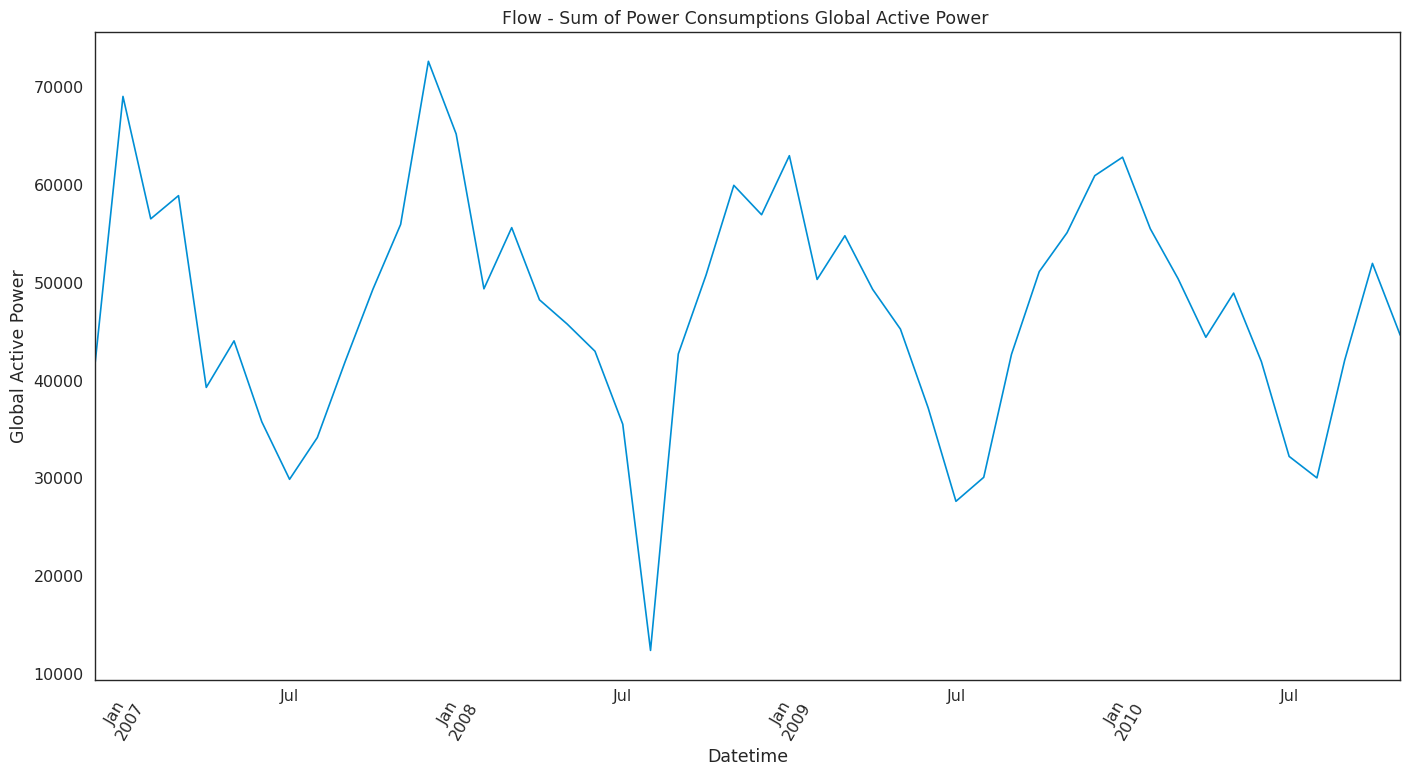

In [67]:
plt.figure(figsize=(15,8))
df['Global_active_power'].resample('M').sum().plot(kind='line')  #  Sum of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow - Sum of Power Consumptions Global Active Power ')
plt.show()

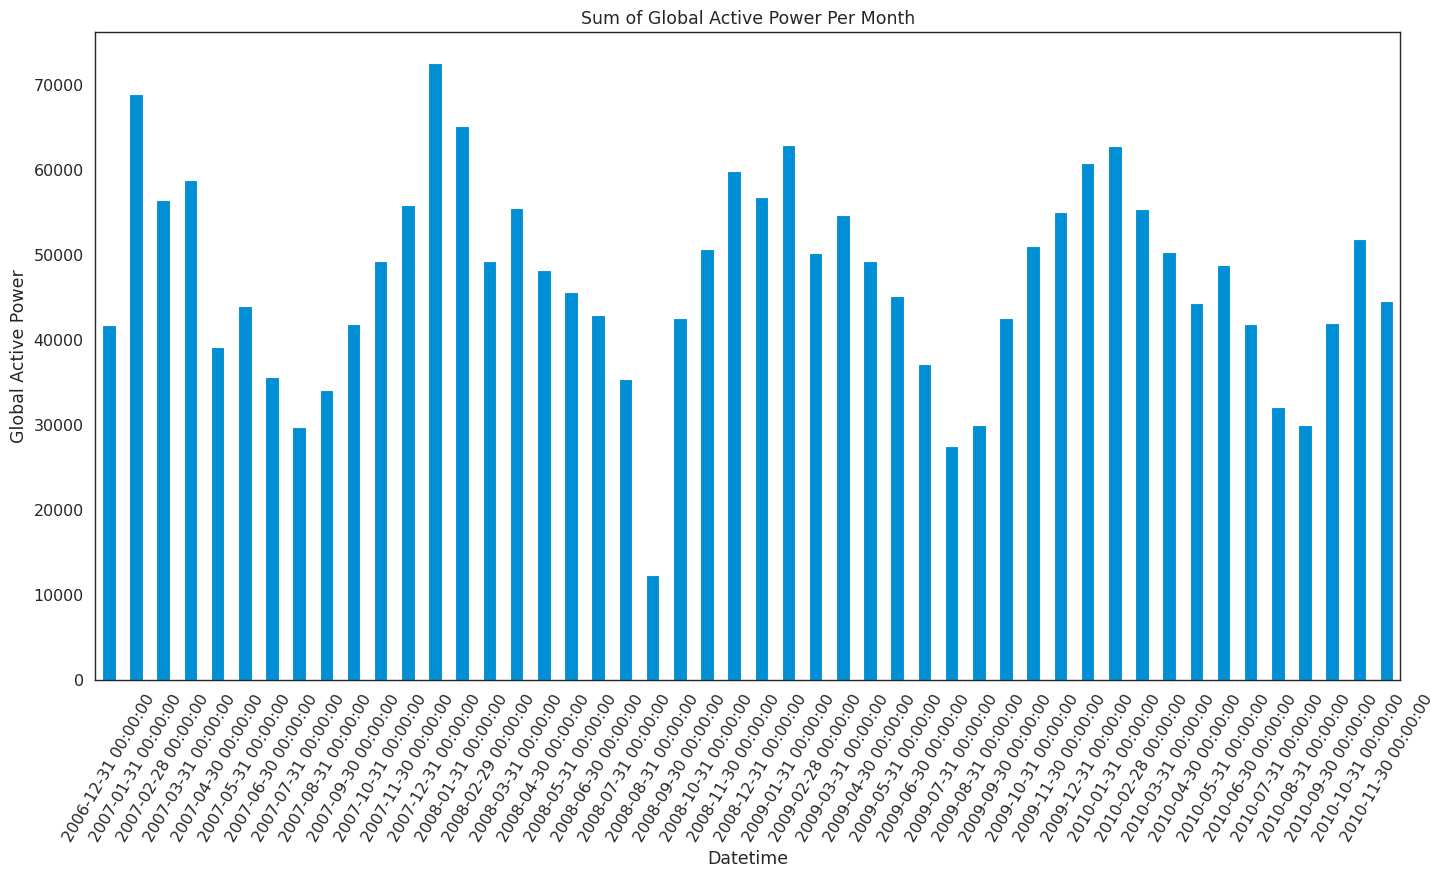

In [68]:
plt.figure(figsize=(15,8))
df['Global_active_power'].resample('M').sum().plot(kind='bar')  #  Sum of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Sum of Global Active Power Per Month')
plt.show()

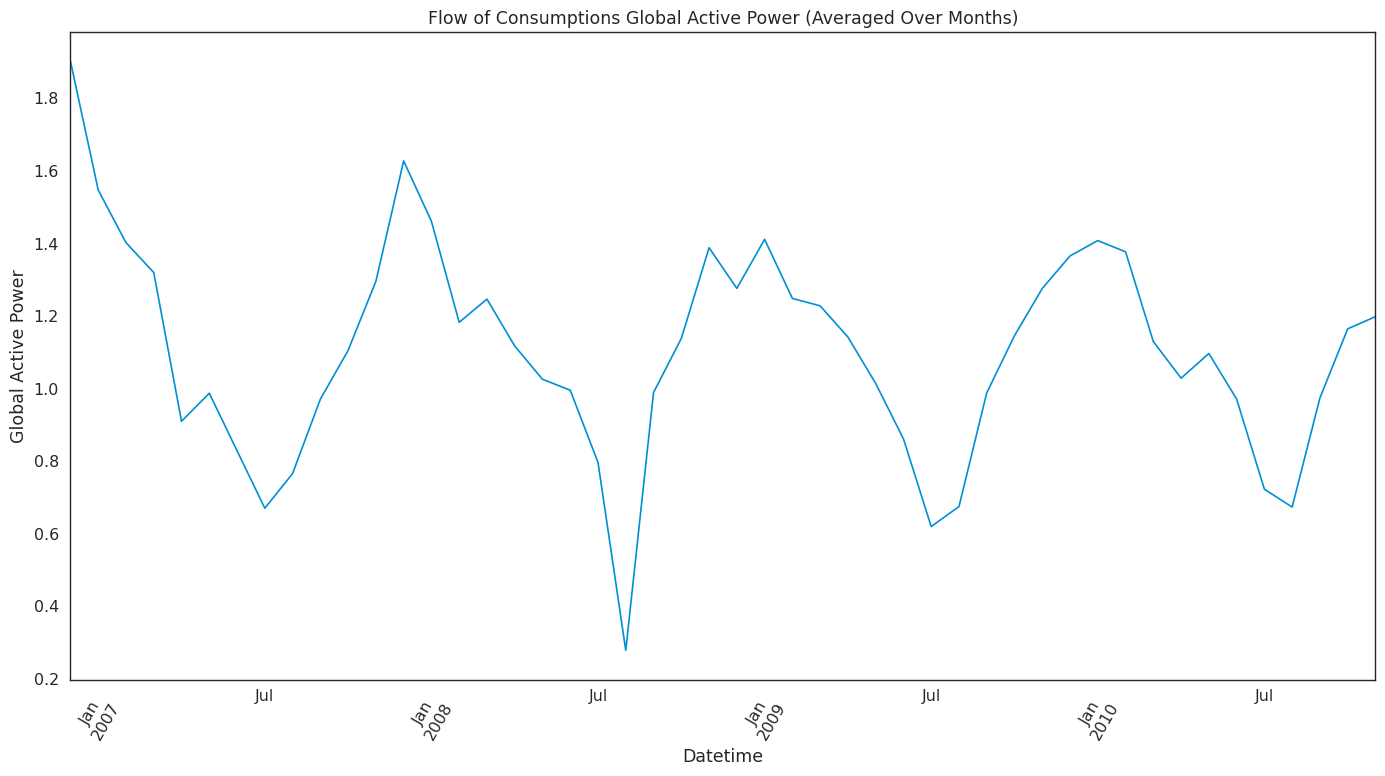

In [69]:
plt.figure(figsize=(15,8))
df['Global_active_power'].resample('M').mean().plot(kind='line')  #  Mean of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow of Consumptions Global Active Power (Averaged Over Months)')
plt.show()

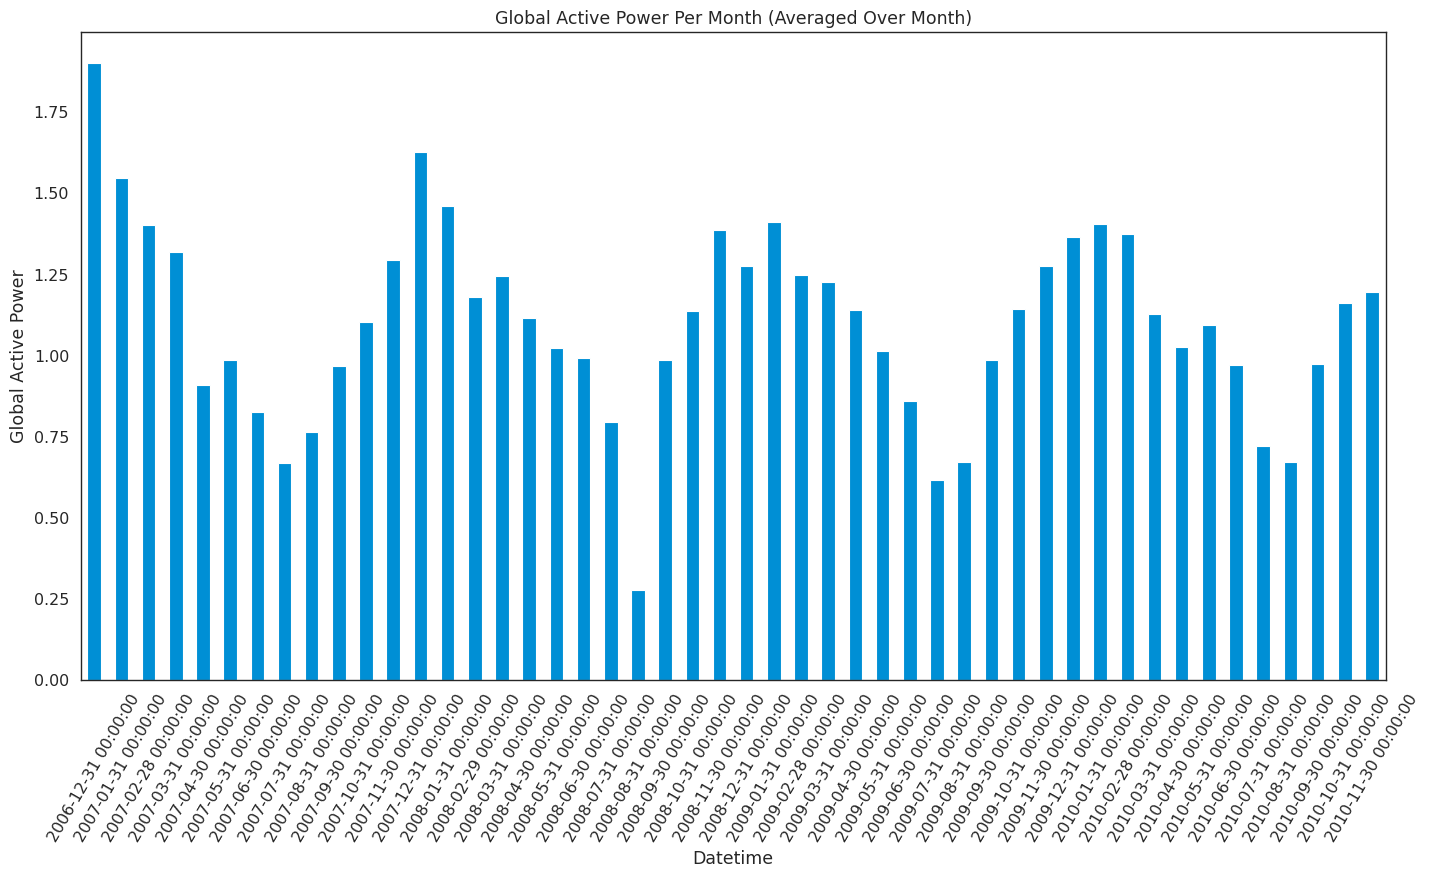

In [70]:
plt.figure(figsize=(15,8))
df['Global_active_power'].resample('M').mean().plot(kind='bar')  #  Mean of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Month (Averaged Over Month)')
plt.show()

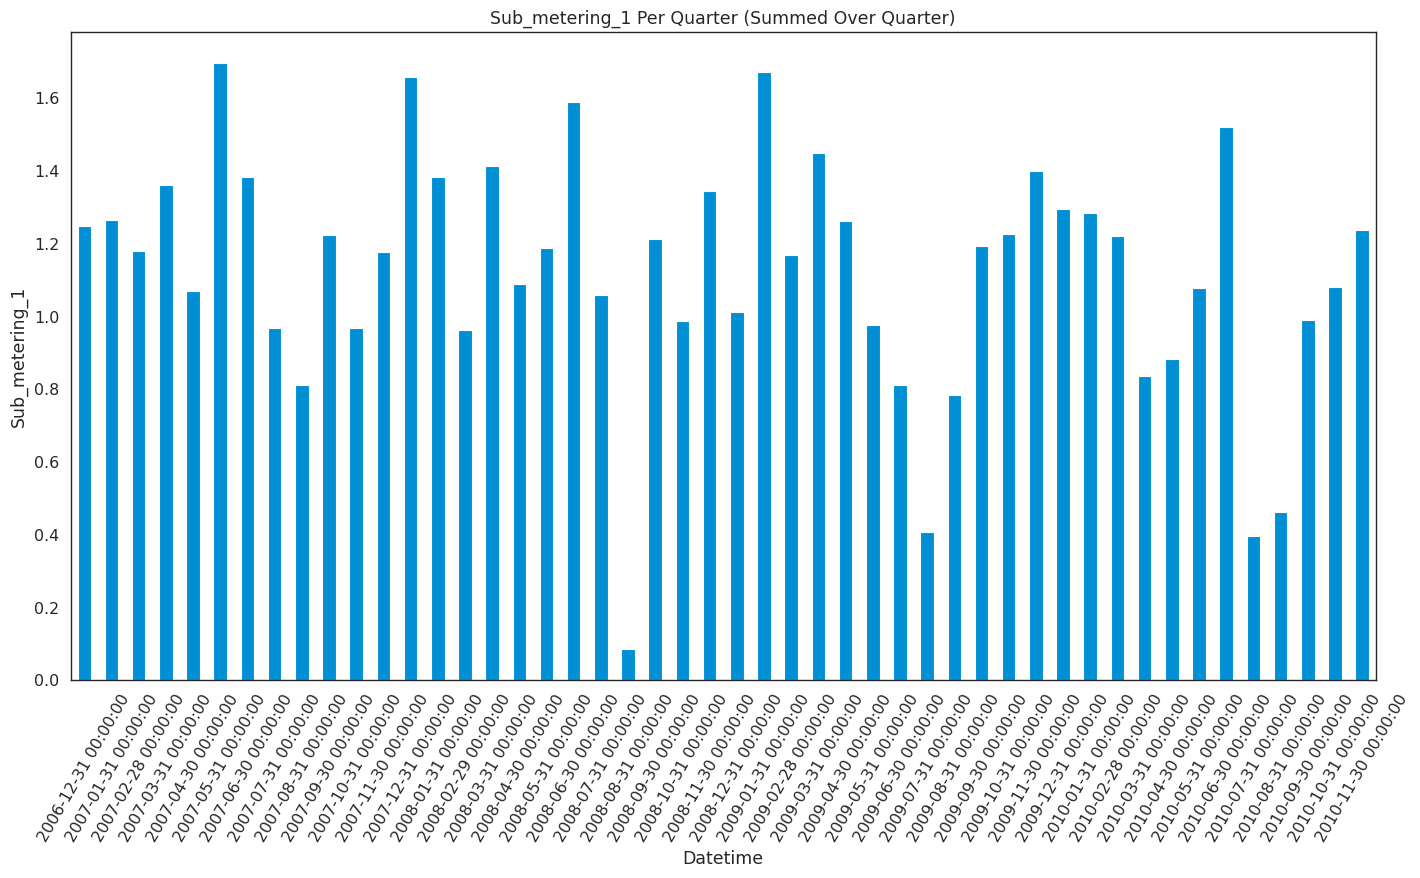

In [71]:
plt.figure(figsize=(15,8))
df['Sub_metering_1'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 Per Quarter (Summed Over Quarter)')
plt.show()

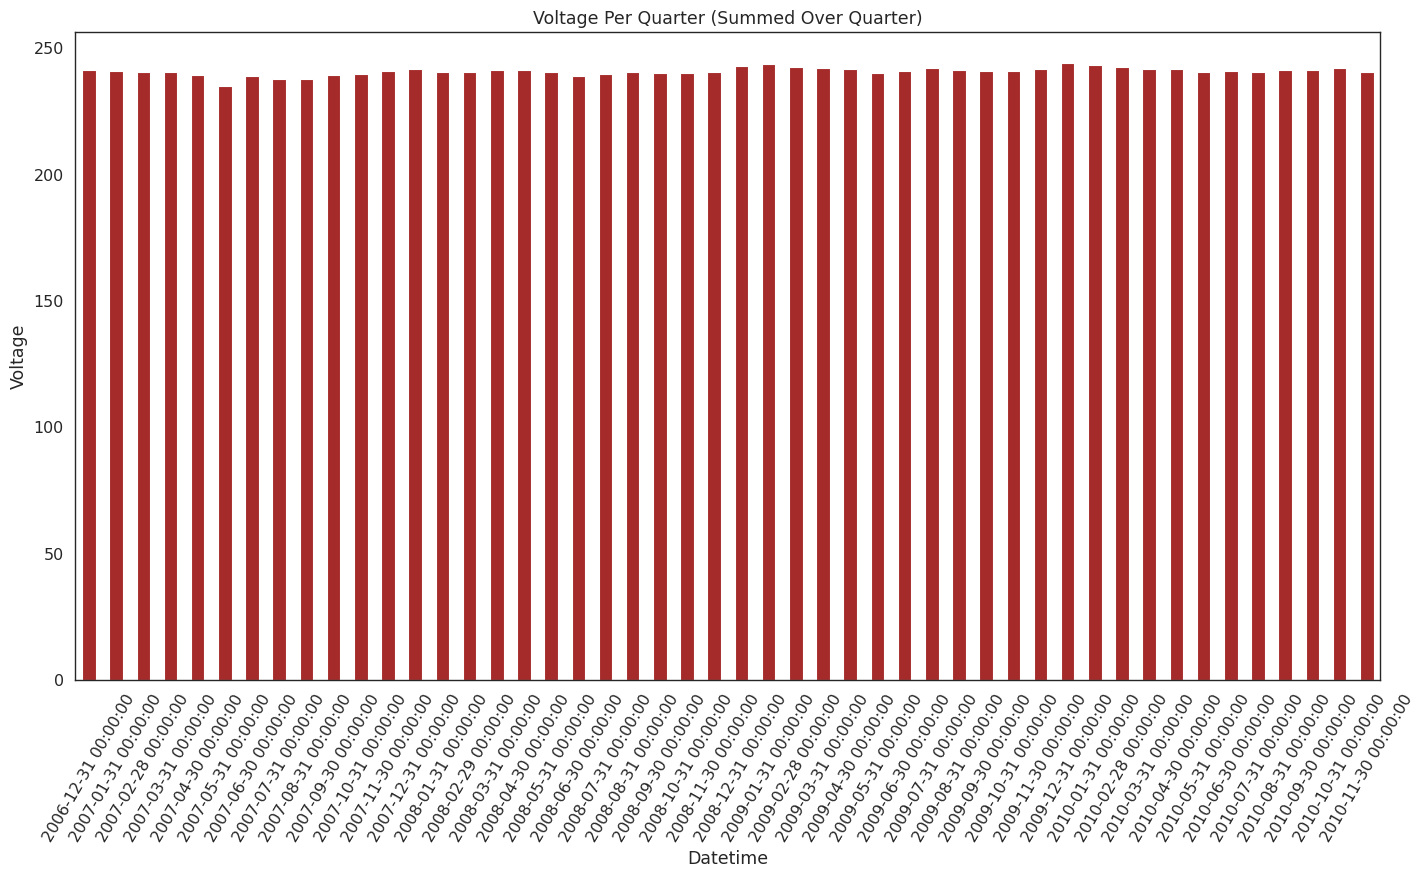

In [72]:
plt.figure(figsize=(15,8))
df['Voltage'].resample('M').mean().plot(kind='bar', color='brown')  #  Mean of 'Voltage' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage Per Quarter (Summed Over Quarter)')
plt.show()

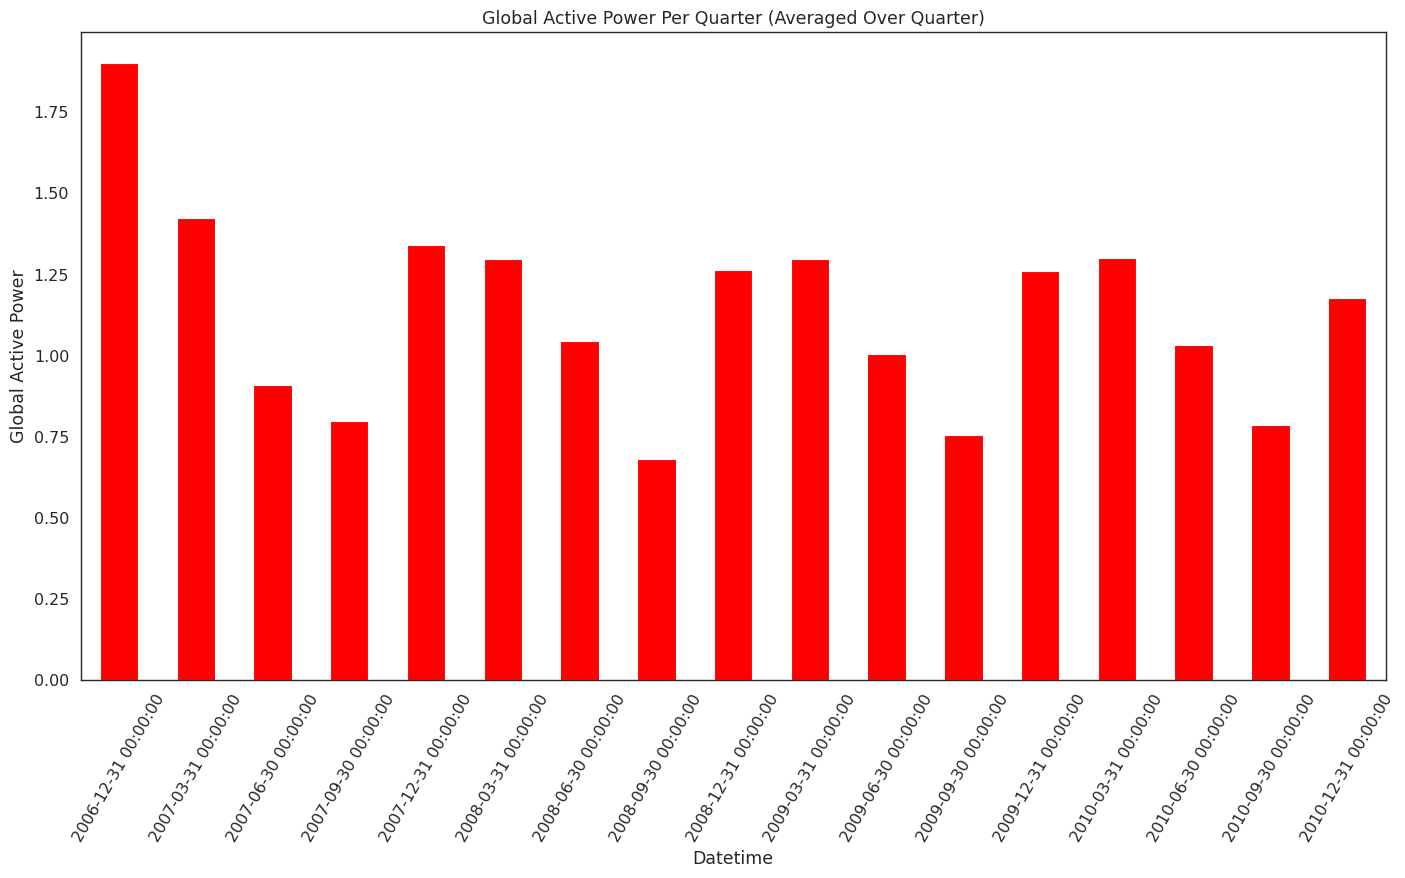

In [73]:
plt.figure(figsize=(15,8))
df['Global_active_power'].resample('Q').mean().plot(kind='bar', color='red')  #  Mean of 'Global_active_power' Resampled Over Quarter
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Quarter (Averaged Over Quarter)')
plt.show()

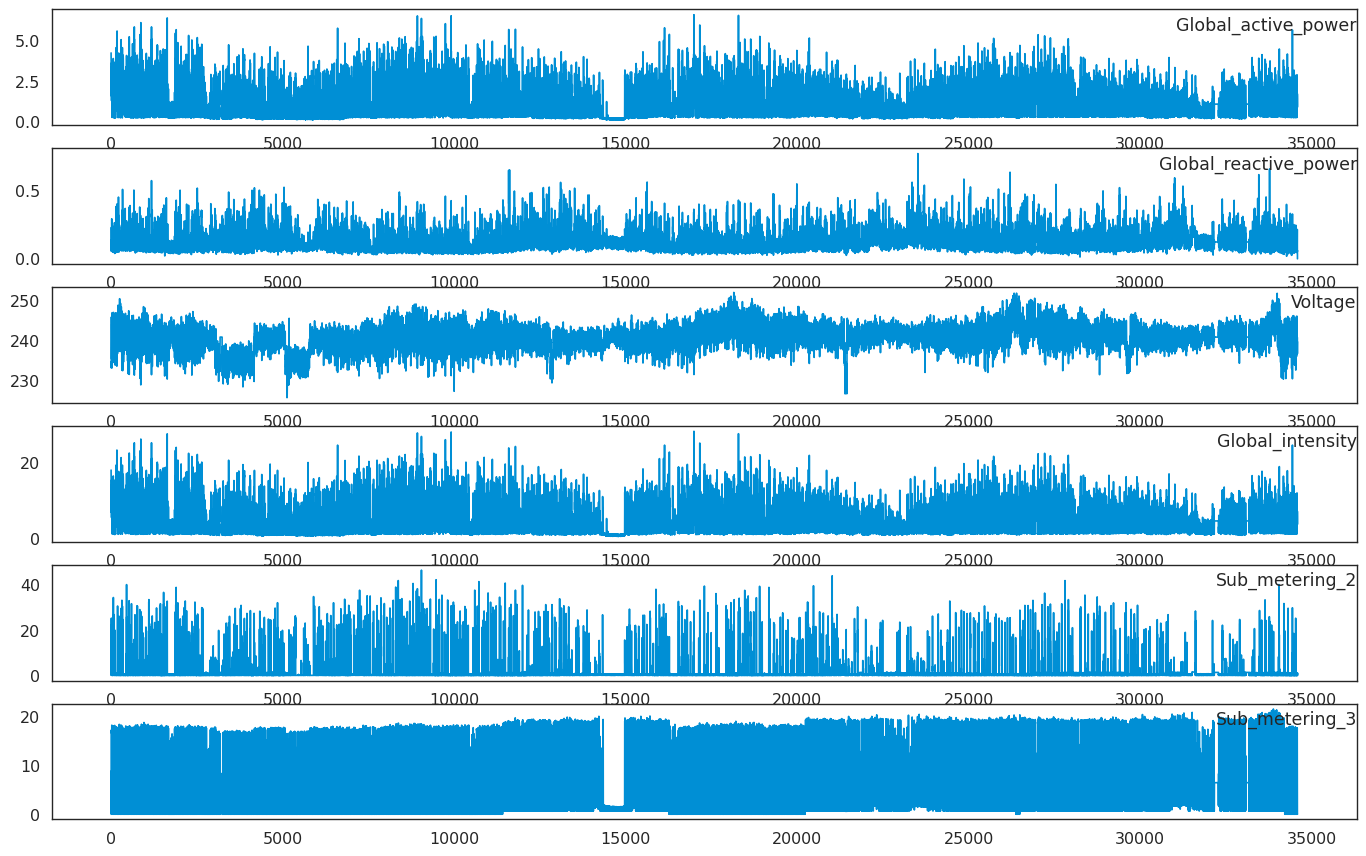

In [74]:
#  Resampling Over Hour & Computing Mean
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('h').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [75]:
#  Dropping Feature: Voltage
df.drop(['Voltage'],1,inplace=True)

In [76]:
def data_prep(data, n_in=1, n_out=1, dropnan=True):
    names, cols = list(), list()
    data_frame = pd.DataFrame(data)
    n = 1 if type(data) is list else data.shape[1]

    for x in range(n_in, 0, -1):  #  Input Sequence (t-n, ... t-1)
        cols.append(data_frame.shift(x))
        names += [('var%d(t-%d)' % (y+1, x)) for y in range(n)]

    for x in range(0, n_out):  #  Forecast Sequence (t, t+1, ... t+n)
        cols.append(data_frame.shift(-x))
        if x == 0:
            names += [('var%d(t)' % (y+1)) for y in range(n)]
        else:
            names += [('var%d(t+%d)' % (y+1, x)) for y in range(n)]

    z = pd.concat(cols, axis=1)  #  Putting It All Together
    z.columns = names

    if dropnan:  #  Dropping Rows With NaN Values
        z.dropna(inplace=True)
    return z

In [77]:
#  Resampling of Data Over Hour
over_hour = df.resample('h').mean()
over_hour.shape

(34589, 6)

In [78]:
over_hour.tail()

Global_active_power  Global_reactive_power  \
Datetime                                                          
2010-11-26 17:00:00             1.725900               0.061400   
2010-11-26 18:00:00             1.573467               0.053700   
2010-11-26 19:00:00             1.659333               0.060033   
2010-11-26 20:00:00             1.163700               0.061167   
2010-11-26 21:00:00             0.934667               0.000000   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2010-11-26 17:00:00          7.216667             0.0        0.000000   
2010-11-26 18:00:00          6.620000             0.0        0.000000   
2010-11-26 19:00:00          7.056667             0.0        0.066667   
2010-11-26 20:00:00          4.913333             0.0        1.066667   
2010-11-26 21:00:00          3.800000             0.0        0.000000   

                     Sub_metering_3  
Datetime                             
2010-11-26 17:00:00       12.866667  
2010-11-26 18:00:00        0.000000  
2010-11-26 19:00:00        0.000000  
2010-11-26 20:00:00        0.000000  
2010-11-26 21:00:00        0.000000

In [79]:
#  Training Based On The Resampled Data (Over Hour)
results = over_hour.values

In [81]:
#  Normalizing Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results)
s.shape

(34589, 6)

In [82]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.636816   0.295738   0.631157        0.0   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.541487        0.0   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.502152        0.0   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.481110        0.0   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.449904        0.0   0.008973   0.798917  0.322555


In [83]:
#  Splitting Into Train & Test Sets
results = r.values

In [84]:
duration = 365 * 24
train = results[:duration, :]
test = results[duration:, :]

In [85]:
#  Splitting Into Input & Outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [86]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  #  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 1, 6) (8760,) (25828, 1, 6) (25828,)


In [87]:
print ('X_train Shape : ',X_train.shape)
print ('y_train Shape : ',y_train.shape)
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_train Shape :  (8760, 1, 6)
y_train Shape :  (8760,)
X_test Shape :  (25828, 1, 6)
y_test Shape :  (25828,)


In [88]:
# For Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [89]:
#  LSTM Model Architecture
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

In [90]:
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 200)            165600    
                                                                 
 dropout (Dropout)           (None, 1, 200)            0         
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 486601 (1.86 MB)
Trainable params: 486601 (1.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
#  Fitting Network
history = model.fit(X_train, y_train, epochs = 100, batch_size = 70, validation_data = (X_test, y_test), verbose = 2, shuffle = False)

Epoch 1/100
126/126 - 12s - loss: 0.0177 - val_loss: 0.0103 - 12s/epoch - 92ms/step
Epoch 2/100
126/126 - 3s - loss: 0.0110 - val_loss: 0.0090 - 3s/epoch - 27ms/step
Epoch 3/100
126/126 - 3s - loss: 0.0106 - val_loss: 0.0089 - 3s/epoch - 23ms/step
Epoch 4/100
126/126 - 3s - loss: 0.0105 - val_loss: 0.0091 - 3s/epoch - 23ms/step
Epoch 5/100
126/126 - 4s - loss: 0.0105 - val_loss: 0.0090 - 4s/epoch - 28ms/step
Epoch 6/100
126/126 - 5s - loss: 0.0105 - val_loss: 0.0089 - 5s/epoch - 40ms/step
Epoch 7/100
126/126 - 4s - loss: 0.0105 - val_loss: 0.0089 - 4s/epoch - 29ms/step
Epoch 8/100
126/126 - 3s - loss: 0.0104 - val_loss: 0.0089 - 3s/epoch - 24ms/step
Epoch 9/100
126/126 - 7s - loss: 0.0103 - val_loss: 0.0091 - 7s/epoch - 52ms/step
Epoch 10/100
126/126 - 4s - loss: 0.0103 - val_loss: 0.0089 - 4s/epoch - 33ms/step
Epoch 11/100
126/126 - 4s - loss: 0.0103 - val_loss: 0.0090 - 4s/epoch - 31ms/step
Epoch 12/100
126/126 - 6s - loss: 0.0103 - val_loss: 0.0088 - 6s/epoch - 44ms/step
Epoch 13/10

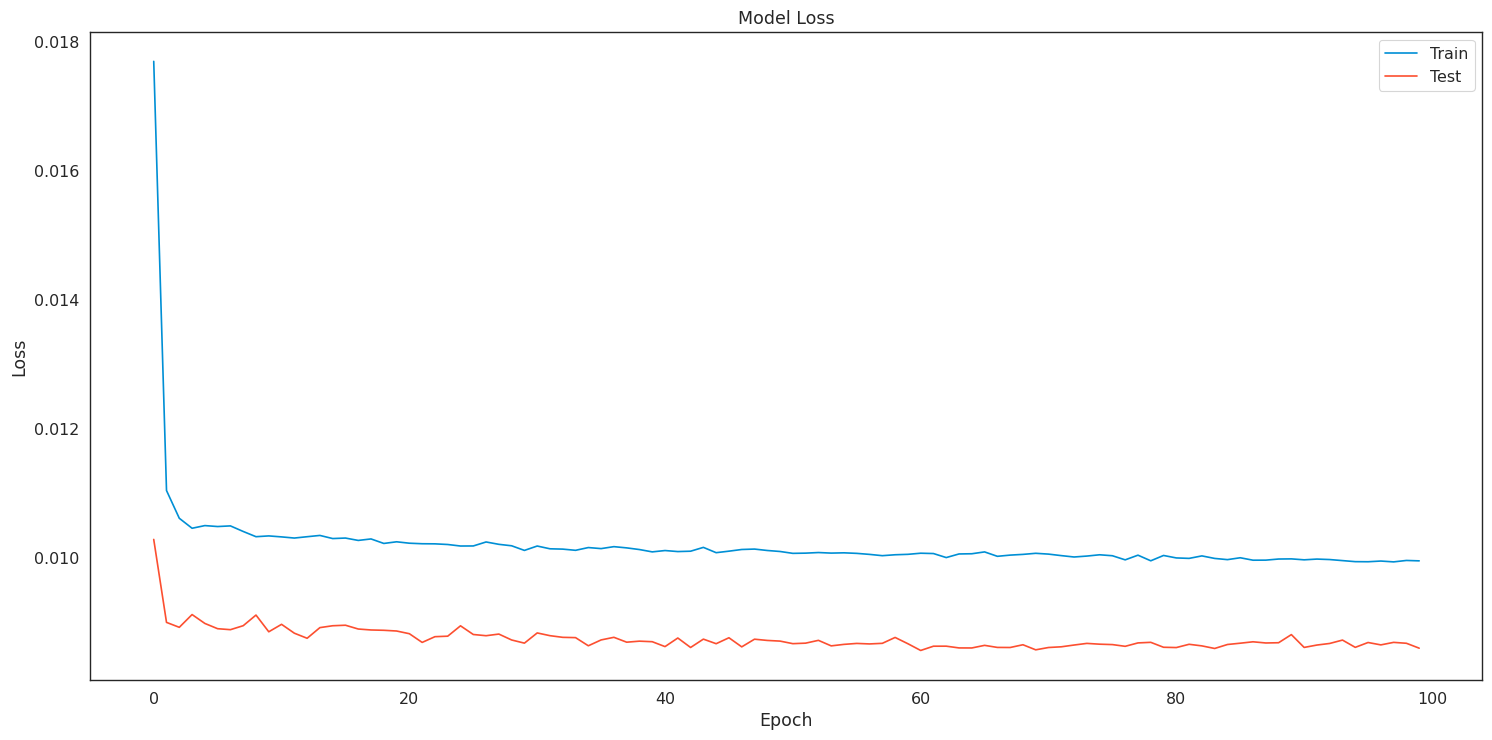

In [93]:
#  Summarizing History For Loss
plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [94]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))

808/808 [==============================] - 4s 3ms/step


In [95]:
#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]

In [96]:
#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [97]:
#  Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

Test RMSE : 0.597


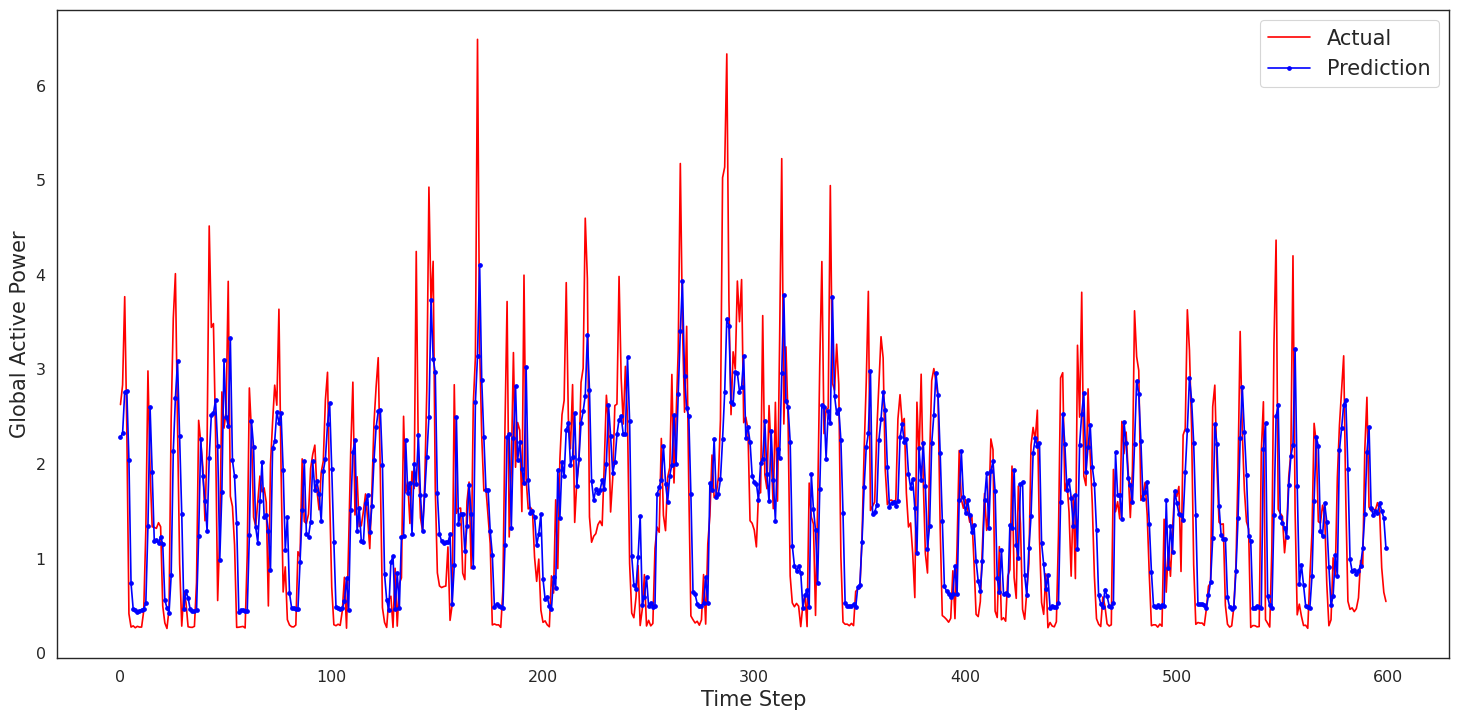

In [98]:
#  Every Time Step is One Hour
#  Compairing The Predictions In 600 Hours
pq = [x for x in range(600)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:600], 'r', label="Actual")
plt.plot(pq, y_pred_i[:600], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()